<h1 style="text-align:center;color:green;font-size:29px;font-family:ALGERIAN;border:solid">Projet Python pour la data science</h1>

<h1 style="text-align:center;color:red;font-size:28px;font-family:times">Ecole Nationale de la Statistique et de l'Administration Economique (ENSAE)</h1><br>
<center><img src="Pays-Potentiel-en-investissement/ENSAE.png" width="100" ></center>

 <center><h2 style="text-align:center;color:blue;font-size:27px;font-family:times"> Recherche des pays potentiels en investissement dans l'éducation </h2></center>
 
 
 --------------------------------------------------------------------------------------------
 
 <div style="display:flex;text-align:justify">
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:70%"> 
<span style="font-weight:bold">Réalisé par: </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li>TIENDREBEOGO Mahamadou</li>
        <li>SARE GNANISSO</li>                                      
        <li>Channdeth SOK</li>     
     </ul>
    <span style="font-style: italic;color:blue;font-size:13px">Eléves Ingénieurs 2A de l'ENSAE IP Paris</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de:</li> 
 <li>Mme ANTUNEZ Kim </li>    
      <span style="font-style: italic;color:blue;font-size:13px">Enseignante à l'ENSAE</span>
</ul>
    
</div>

# <center><font color="violet"> Introduction </font>      </center> 
L'une des étapes importantes dans le processus d'investissement de toute entreprise est l'identification des marchés potentiels suceptibles de générer des retours sur investissement positif. Toute entreprise avant de se lancer dans un marché se doit d'étudier ce marché afin de déceller les opportunités présentes.
Dans le cadre d'un investissement dans le domaine éducatif sur le plan international, il sied de savoir:.
- Quels sont les pays avec un fort potentiel éducatif?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel éducatif ?
- Dans quels pays une telle entreprise doit-elle opérer en priorité ?

Telles sont les questions fondamentales que nous allons resoudre dans notre travail. Il consiste à partir des données sur l'éducation de la banque mondiale méner une analyse afin de guider une entreprise dans son programme principalement d'expansion.
- l’Analyse exploratoire pour juger de la pertinence des données ( Validation de la qualité de ce jeu de données)
- Description des informations contenues dans le jeu de données
- Sélection des informations qui semblent pertinentes pour répondre à la problématique
- L'Analyse Statistiaque afin d'identifier les pays potentiels ( l'analyse en composante principale: ACP,...)
  
  
  

 # <center><font color="violet">  Importation des librairies nécessaires </font></center>

In [1]:
%matplotlib inline
import re
from os import path, getenv, environ
from typing import Dict

import folium
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as stats
import seaborn as sns
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


 ### <center><font color="violet">  Chargement de la base et analyse preeliminaire </font></center>

In [2]:
# Recupération de la localisation des fichiers pour facilitr le travail
ROOT_DIR = path.dirname(path.realpath("__file__"))

ROOT_DIR

'C:\\Users\\sareg\\Python Project'

In [4]:
# Importation de la base de données sous avec la fonction path.join qui prend en argument la localisation
# et le fichier des données
filepath = path.join(ROOT_DIR, "education_stats.csv")
# ce fichier recuperé  sera affecté à la varaible data et le separateur est point virgule.
data = pd.read_csv(filepath, sep=";")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=data.shape))

The data shape is: (2904, 30)


 Ainsi la base comporte 2904 observations(lignes) et 30 colonnes ( variables)

In [7]:
# Appelation de la fonction head pour afficher les premières lignes de data
data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                                                    Indicator Name  \
0                Expenditure on education as % of total government expenditure (%)   
1                              GDP per capita, PPP (constant 2011 international $)   
2  Government expenditure on post-secondary non-tertiary education as % of GDP (%)   
3                    Government expenditure on secondary education as % of GDP (%)   
4                     Government expenditure on tertiary education as % of GDP (%)   

      Indicator Code         2020  Short Name  Table Name   Long Name  \
0  SE.XPD.TOTL.GB.ZS          NaN  Arab World  Arab World  Arab World   
1  NY.GDP.PCAP.PP.KD  11450.86079  Arab World  Arab World  Arab World   
2   UIS.XGDP.4.FSGOV          NaN  Arab World  Arab World  Arab World   
3  UIS.XGDP.23.FSGOV          NaN  Arab World  Arab World  Arab World   
4  UIS.XGDP.56.FSGOV          NaN  Arab World  Arab World  Arab World   

  2-alpha code Currency Unit  \
0           1A           NaN   
1           1A           NaN   
2           1A           NaN   
3           1A           NaN   
4           1A           NaN   

                                                                           Special Notes  \
0  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
1  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
2  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
3  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
4  Arab World aggregate. Arab World is composed of members of the League of Arab States.   

  Region Income Group WB-2 code System of National Accounts  \
0    NaN          NaN        1A                         NaN   
1    NaN          NaN        1A                         NaN   
2    NaN          NaN        1A                         NaN   
3    NaN          NaN        1A                         NaN   
4    NaN          NaN        1A                         NaN   

  Alternative conversion factor PPP survey year        Series Code  \
0                           NaN             NaN  SE.XPD.TOTL.GB.ZS   
1                           NaN             NaN  NY.GDP.PCAP.PP.KD   
2                           NaN             NaN   UIS.XGDP.4.FSGOV   
3                           NaN             NaN  UIS.XGDP.23.FSGOV   
4                           NaN             NaN  UIS.XGDP.56.FSGOV   

                                             Topic Short definition  \
0                                     Expenditures              NaN   
1  Economic Policy & Debt: Purchasing power parity              NaN   
2                                     Expenditures              NaN   
3                                     Expenditures              NaN   
4                                     Expenditures              NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

La base de données  contient plusieurs variables. Nous avons entre autres la variable indicator Name qui indique le pays correspondant, une variable qui renseigne sur les indicateurs. Ainsi pour chaque pays on donne un certains nombre d'indicateurs tels que l'utilisation de l'internet, les depenses du gouverneent dans l'education le PIB par tete. La valeur de l'indicateur est localisée dans la variable 2020. Ces données concernent l'année 2020. Par ailleurs, la base contient des données manquantes.

In [8]:
# Affichage des informations sur les variables( les types: float, object, character,...) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   2904 non-null   object 
 1   Country Code                   2904 non-null   object 
 2   Indicator Name                 2904 non-null   object 
 3   Indicator Code                 2904 non-null   object 
 4   2020                           1588 non-null   float64
 5   Short Name                     2892 non-null   object 
 6   Table Name                     2892 non-null   object 
 7   Long Name                      2892 non-null   object 
 8   2-alpha code                   2856 non-null   object 
 9   Currency Unit                  2580 non-null   object 
 10  Special Notes                  1740 non-null   object 
 11  Region                         2568 non-null   object 
 12  Income Group                   2568 non-null   o

In [18]:
# Stat descriptive des variables pour avoir une vue globale des variables
data.describe(include="all")

Country Name Country Code  \
count          2904         2904   
unique          242          242   
top         Estonia          TUN   
freq             12           12   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                             Indicator Name  \
count                                                  2904   
unique                                                   12   
top     GDP per capita, PPP (constant 2011 international $)   
freq                                                    242   
mean                                                    NaN   
std                                                     NaN   
min                                                     NaN   
25%                                                     NaN   
50%                                                     NaN   
75%                                                     NaN   
max                                                     NaN   

           Indicator Code          2020 Short Name Table Name  \
count                2904  1.588000e+03       2892       2892   
unique                 12           NaN        241        241   
top     SE.XPD.TOTL.GB.ZS           NaN       Iraq    Estonia   
freq                  242           NaN         12         12   
mean                  NaN  2.592391e+07        NaN        NaN   
std                   NaN  2.664621e+08        NaN        NaN   
min                   NaN  0.000000e+00        NaN        NaN   
25%                   NaN  6.537010e+00        NaN        NaN   
50%                   NaN  5.044388e+01        NaN        NaN   
75%                   NaN  2.746509e+03        NaN        NaN   
max                   NaN  6.118075e+09        NaN        NaN   

                  Long Name 2-alpha code Currency Unit  \
count                  2892         2856          2580   
unique                  241          238           152   
top     Republic of Moldova           RW          Euro   
freq                     12           12           276   
mean                    NaN          NaN           NaN   
std                     NaN          NaN           NaN   
min                     NaN          NaN           NaN   
25%                     NaN          NaN           NaN   
50%                     NaN          NaN           NaN   
75%                     NaN          NaN           NaN   
max                     NaN          NaN           NaN   

                                                                                                                                                   Special Notes  \
count                                                                                                                                                       1740   
unique                                                                                                                                                       131   
top     April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.   
freq                                                                                                                                                          72   
mean                                                                                                                                                         NaN   
std                                                                                                                                                          NaN   
min                                                                                                                                                          NaN   
25%                        

Les noms des variabales contiennent des espaces, il faut renommer pour faciliter la manipulation.

In [9]:
# Renommer les variables contenant des espaces avec la fonction replace ( espace devient tiret de huit)
# Rename columns: replace space & - by _
data.columns = data.columns.str.lower().str.replace('[-\s]', '_', regex=True)
data.head()

country_name country_code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                                                    indicator_name  \
0                Expenditure on education as % of total government expenditure (%)   
1                              GDP per capita, PPP (constant 2011 international $)   
2  Government expenditure on post-secondary non-tertiary education as % of GDP (%)   
3                    Government expenditure on secondary education as % of GDP (%)   
4                     Government expenditure on tertiary education as % of GDP (%)   

      indicator_code         2020  short_name  table_name   long_name  \
0  SE.XPD.TOTL.GB.ZS          NaN  Arab World  Arab World  Arab World   
1  NY.GDP.PCAP.PP.KD  11450.86079  Arab World  Arab World  Arab World   
2   UIS.XGDP.4.FSGOV          NaN  Arab World  Arab World  Arab World   
3  UIS.XGDP.23.FSGOV          NaN  Arab World  Arab World  Arab World   
4  UIS.XGDP.56.FSGOV          NaN  Arab World  Arab World  Arab World   

  2_alpha_code currency_unit  \
0           1A           NaN   
1           1A           NaN   
2           1A           NaN   
3           1A           NaN   
4           1A           NaN   

                                                                           special_notes  \
0  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
1  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
2  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
3  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
4  Arab World aggregate. Arab World is composed of members of the League of Arab States.   

  region income_group wb_2_code system_of_national_accounts  \
0    NaN          NaN        1A                         NaN   
1    NaN          NaN        1A                         NaN   
2    NaN          NaN        1A                         NaN   
3    NaN          NaN        1A                         NaN   
4    NaN          NaN        1A                         NaN   

  alternative_conversion_factor ppp_survey_year        series_code  \
0                           NaN             NaN  SE.XPD.TOTL.GB.ZS   
1                           NaN             NaN  NY.GDP.PCAP.PP.KD   
2                           NaN             NaN   UIS.XGDP.4.FSGOV   
3                           NaN             NaN  UIS.XGDP.23.FSGOV   
4                           NaN             NaN  UIS.XGDP.56.FSGOV   

                                             topic short_definition  \
0                                     Expenditures              NaN   
1  Economic Policy & Debt: Purchasing power parity              NaN   
2                                     Expenditures              NaN   
3                                     Expenditures              NaN   
4                                     Expenditures              NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

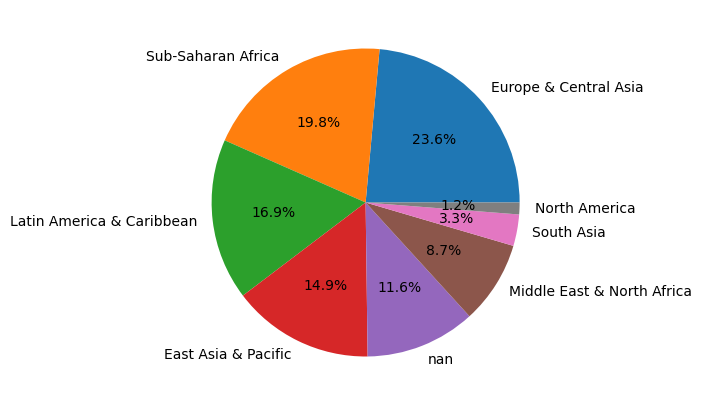

In [10]:
# Vue globale sur les régions représentées à l'aide d'un diagramme circulaire( chaque région avec son nombre de pays: en pourcentage)
(data.region
 .value_counts(dropna=False)
 .plot(kind="pie", autopct='%.1f%%', legend = False, fontsize=10,
      xlabel="", ylabel="", table=False, figsize=(5, 5))
);

Toutes les zones sont représentées. Mais il existe une région nan qui contient 11,6% de pays. Ce sont des erreurs d'observations cela veut dire que ces pays n'ont pas de régions.

In [21]:
# Affichage des pays correspondant à des régions manquantes à l'aide de la fonction loc. Cette fonction nous affiche les pays sans région
data.loc[data.region.isnull(), "country_name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Gibraltar', 'Nauru'], dtype=object)

In [24]:
# Suppression de tous les pays sans region( avec region manquante)
data = data.loc[data.region.notnull()]

<center><h1 style="text-align:left;color:violet;font-size:25px;font-family:ALGERIAN"> PREPROCCESSING</h1></center>


<p style="text-align:justify;font-family:times;font-size:15px">
Dans cette partie, il sera question d'effectuer une analyse globale de notre jeu de données. Nous allons nous interesser particulierement à:
    <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times">L'analyse des doublons</span> qui consiste à voir si nos individus existent de manière unique dans notre base.</li>
    <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times">L'analyse des valeurs manquantes</span> qui consiste à voir s'il n'existe pas dans notre jeu de données des lignes ou des colonnes vides.</li>
    <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times"> La visualisation de nos variables</span> afin d'observer les interactions qui pourraient exister entre les variables </li>
      <li style="text-align:justify;font-family:times;font-size:15px"><span style="font-weight:bold;font-family:times"> Le resumé stastique de nos variables</span> </li>
    
</p>

In [25]:
data.describe(include="all")

country_name country_code  \
count          2568         2568   
unique          214          214   
top         Estonia          TUN   
freq             12           12   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                                       indicator_name  \
count                                                            2568   
unique                                                             12   
top     Government expenditure on secondary education as % of GDP (%)   
freq                                                              214   
mean                                                              NaN   
std                                                               NaN   
min                                                               NaN   
25%                                                               NaN   
50%                                                               NaN   
75%                                                               NaN   
max                                                               NaN   

           indicator_code          2020 short_name table_name  \
count                2568  1.436000e+03       2568       2568   
unique                 12           NaN        214        214   
top     SE.XPD.TOTL.GB.ZS           NaN    Estonia    Estonia   
freq                  214           NaN         12         12   
mean                  NaN  4.246925e+06        NaN        NaN   
std                   NaN  4.586961e+07        NaN        NaN   
min                   NaN  0.000000e+00        NaN        NaN   
25%                   NaN  5.699508e+00        NaN        NaN   
50%                   NaN  4.871977e+01        NaN        NaN   
75%                   NaN  2.327380e+03        NaN        NaN   
max                   NaN  1.262645e+09        NaN        NaN   

               long_name 2_alpha_code currency_unit  \
count               2568         2532          2568   
unique               214          211           151   
top     Republic of Iraq           RW          Euro   
freq                  12           12           276   
mean                 NaN          NaN           NaN   
std                  NaN          NaN           NaN   
min                  NaN          NaN           NaN   
25%                  NaN          NaN           NaN   
50%                  NaN          NaN           NaN   
75%                  NaN          NaN           NaN   
max                  NaN          NaN           NaN   

                                                                                                                                                   special_notes  \
count                                                                                                                                                       1440   
unique                                                                                                                                                       106   
top     April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.   
freq                                                                                                                                                          72   
mean                                                                                                                                                         NaN   
std                                                                                                                                                          NaN   
min                                                                                                        

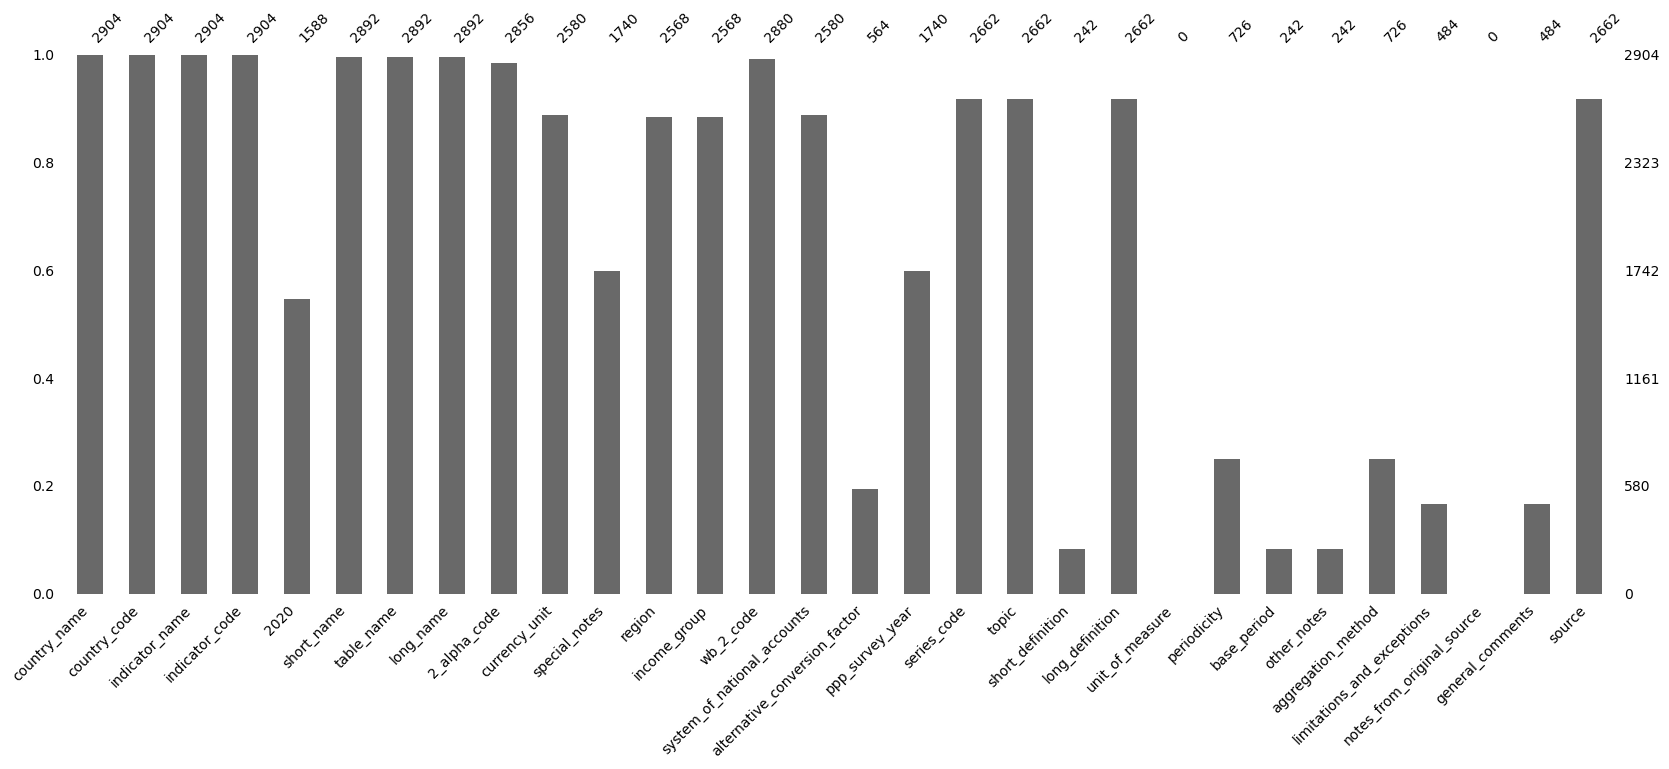

In [11]:
# Observation de la distribution des valeurs manquantes par colonne (histogramme)
msno.bar(data, figsize=(20, 7), fontsize=10);

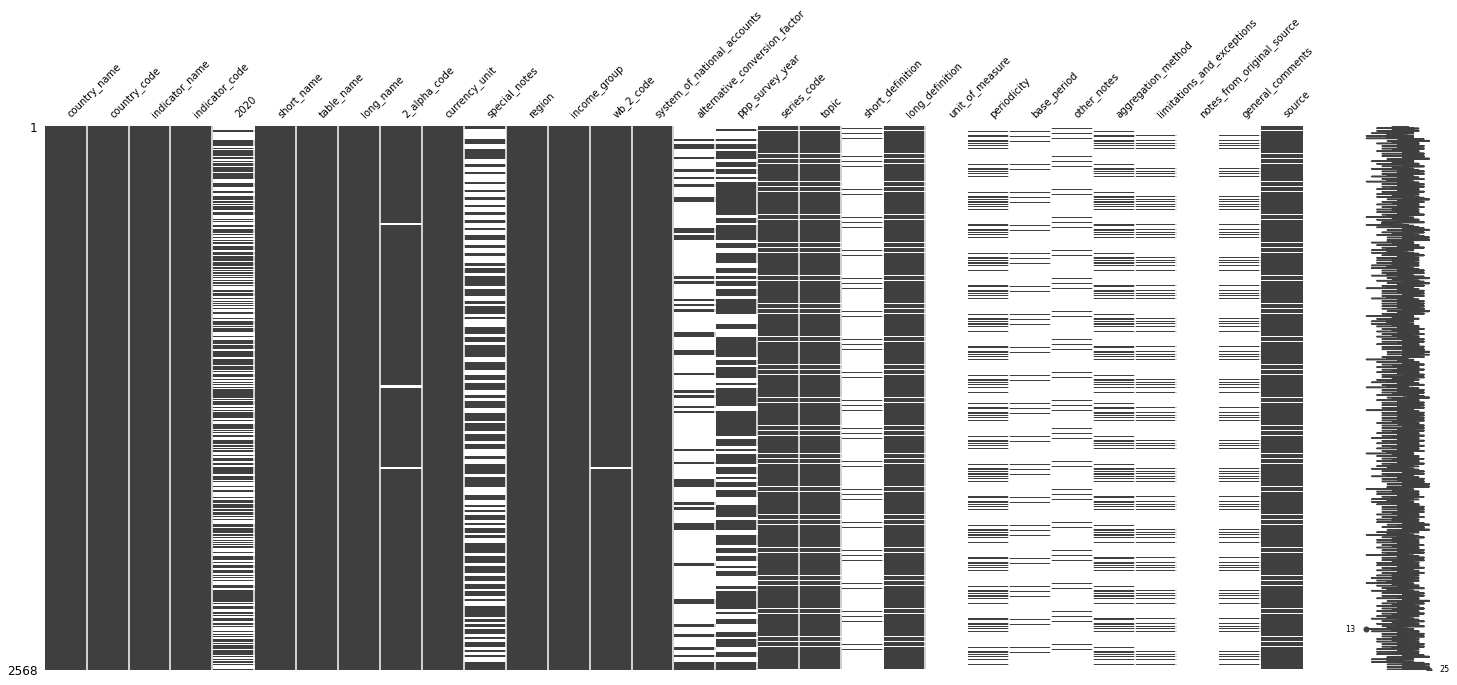

In [30]:
#Distribution des valeurs manquantes par la fonction matrix: elle nous indique les positions des valeurs manquantes
msno.matrix(data, figsize=(25, 10), fontsize=10);

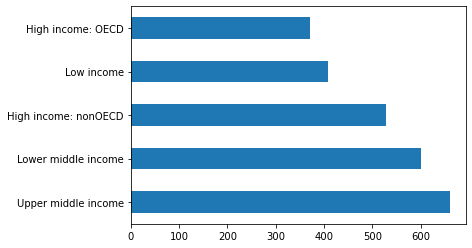

In [32]:
### Fréquence de la variable income group (histogramme par groupe de revenu)
data.income_group.value_counts().plot(kind="barh");

In [12]:
# filtrer low income group: Ce sont des pays à RNB(Revenu national Brut) par habitant inferieur ou égal à 1000 dollars selon la 
# banque mondiale
# Nous allons recupérer ces pays et les écarter de l'analyse car ils n'ont pas de fort potentiel éducatif
LOW_INCOME_FILTER = data.income_group.str.contains("low", regex=True, flags=re.I, na=False)
data.loc[LOW_INCOME_FILTER, "country_name"].unique()

array(['Afghanistan', 'Armenia', 'Bangladesh', 'Benin', 'Bhutan',
       'Bolivia', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti',
       'Egypt, Arab Rep.', 'El Salvador', 'Eritrea', 'Ethiopia',
       'Gambia, The', 'Georgia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Kenya', 'Kiribati', 'Korea, Dem. People’s Rep.',
       'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco',
       'Mozambique', 'Myanmar', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
       'Pakistan', 'Papua New Guinea', 'Paraguay', 'Philippines',
       'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Sudan',
    

In [16]:
# Ne garder que les pays n'ayant pas de faible RNB par habitant
data = data.loc[~LOW_INCOME_FILTER]
print(f"data shape: {data.shape}")
data.head()

data shape: (1896, 30)


country_name country_code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                                                    indicator_name  \
0                Expenditure on education as % of total government expenditure (%)   
1                              GDP per capita, PPP (constant 2011 international $)   
2  Government expenditure on post-secondary non-tertiary education as % of GDP (%)   
3                    Government expenditure on secondary education as % of GDP (%)   
4                     Government expenditure on tertiary education as % of GDP (%)   

      indicator_code         2020  short_name  table_name   long_name  \
0  SE.XPD.TOTL.GB.ZS          NaN  Arab World  Arab World  Arab World   
1  NY.GDP.PCAP.PP.KD  11450.86079  Arab World  Arab World  Arab World   
2   UIS.XGDP.4.FSGOV          NaN  Arab World  Arab World  Arab World   
3  UIS.XGDP.23.FSGOV          NaN  Arab World  Arab World  Arab World   
4  UIS.XGDP.56.FSGOV          NaN  Arab World  Arab World  Arab World   

  2_alpha_code currency_unit  \
0           1A           NaN   
1           1A           NaN   
2           1A           NaN   
3           1A           NaN   
4           1A           NaN   

                                                                           special_notes  \
0  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
1  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
2  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
3  Arab World aggregate. Arab World is composed of members of the League of Arab States.   
4  Arab World aggregate. Arab World is composed of members of the League of Arab States.   

  region income_group wb_2_code system_of_national_accounts  \
0    NaN          NaN        1A                         NaN   
1    NaN          NaN        1A                         NaN   
2    NaN          NaN        1A                         NaN   
3    NaN          NaN        1A                         NaN   
4    NaN          NaN        1A                         NaN   

  alternative_conversion_factor ppp_survey_year        series_code  \
0                           NaN             NaN  SE.XPD.TOTL.GB.ZS   
1                           NaN             NaN  NY.GDP.PCAP.PP.KD   
2                           NaN             NaN   UIS.XGDP.4.FSGOV   
3                           NaN             NaN  UIS.XGDP.23.FSGOV   
4                           NaN             NaN  UIS.XGDP.56.FSGOV   

                                             topic short_definition  \
0                                     Expenditures              NaN   
1  Economic Policy & Debt: Purchasing power parity              NaN   
2                                     Expenditures              NaN   
3                                     Expenditures              NaN   
4                                     Expenditures              NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [14]:
data.describe(include="all")

country_name country_code  \
count          1896         1896   
unique          158          158   
top      Arab World          ARB   
freq             12           12   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                                           indicator_name  \
count                                                                1896   
unique                                                                 12   
top     Expenditure on education as % of total government expenditure (%)   
freq                                                                  158   
mean                                                                  NaN   
std                                                                   NaN   
min                                                                   NaN   
25%                                                                   NaN   
50%                                                                   NaN   
75%                                                                   NaN   
max                                                                   NaN   

           indicator_code          2020  short_name  table_name   long_name  \
count                1896  1.037000e+03        1884        1884        1884   
unique                 12           NaN         157         157         157   
top     SE.XPD.TOTL.GB.ZS           NaN  Arab World  Arab World  Arab World   
freq                  158           NaN          12          12          12   
mean                  NaN  3.705797e+07         NaN         NaN         NaN   
std                   NaN  3.274435e+08         NaN         NaN         NaN   
min                   NaN  1.670000e-03         NaN         NaN         NaN   
25%                   NaN  9.728620e+00         NaN         NaN         NaN   
50%                   NaN  5.565753e+01         NaN         NaN         NaN   
75%                   NaN  7.931259e+03         NaN         NaN         NaN   
max                   NaN  6.118075e+09         NaN         NaN         NaN   

       2_alpha_code currency_unit  \
count          1860          1572   
unique          155            87   
top              1A          Euro   
freq             12           264   
mean            NaN           NaN   
std             NaN           NaN   
min             NaN           NaN   
25%             NaN           NaN   
50%             NaN           NaN   
75%             NaN           NaN   
max             NaN           NaN   

                                                                                                                                                   special_notes  \
count                                                                                                                                                       1140   
unique                                                                                                                                                        86   
top     April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.   
freq                                                                                                                                                          72   
mean                                                                                                                                                         NaN   
std                                                                                                                                                          NaN   
min                                                                                                        

In [17]:
#Ce sont les indicateurs qui nous serviront dans la suite, pour notre analyse
#Affichage de la liste des indicateurs( noms et code par ordre croissant de code)
(data
 .loc[:, ["indicator_name", "indicator_code"]]
 .drop_duplicates()
 .sort_values(by="indicator_code")
 .reset_index(drop=True)
)

indicator_name  \
0                                                                                      Internet users (per 100 people)   
1                                                                  GDP per capita, PPP (constant 2011 international $)   
2                                                               Gross enrolment ratio, upper secondary, both sexes (%)   
3                                                                      Gross enrolment ratio, tertiary, both sexes (%)   
4                                                    Expenditure on education as % of total government expenditure (%)   
5                                                                                  Population, ages 15-64 (% of total)   
6                                                                                                    Population, total   
7   UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
8                                                   Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)   
9                                                        Government expenditure on secondary education as % of GDP (%)   
10                                     Government expenditure on post-secondary non-tertiary education as % of GDP (%)   
11                                                        Government expenditure on tertiary education as % of GDP (%)   

        indicator_code  
0       IT.NET.USER.P2  
1    NY.GDP.PCAP.PP.KD  
2       SE.SEC.ENRR.UP  
3          SE.TER.ENRR  
4    SE.XPD.TOTL.GB.ZS  
5    SP.POP.1564.TO.ZS  
6          SP.POP.TOTL  
7   UIS.EA.3T6.AG25T99  
8            UIS.GER.4  
9    UIS.XGDP.23.FSGOV  
10    UIS.XGDP.4.FSGOV  
11   UIS.XGDP.56.FSGOV

In [20]:
# description du nombre d'indicateurs par pays
df_nb_indicators_by_country = data.groupby(["region", "country_name", "country_code"],
                                           as_index=False, dropna=False)["2020"].count()

df_nb_indicators_by_country.describe(include="all")

region    country_name country_code        2020
count                     130             158          158  158.000000
unique                      7             158          158         NaN
top     Europe & Central Asia  American Samoa          ASM         NaN
freq                       49               1            1         NaN
mean                      NaN             NaN          NaN    6.563291
std                       NaN             NaN          NaN    2.774850
min                       NaN             NaN          NaN    0.000000
25%                       NaN             NaN          NaN    5.000000
50%                       NaN             NaN          NaN    6.000000
75%                       NaN             NaN          NaN    8.750000
max                       NaN             NaN          NaN   12.000000

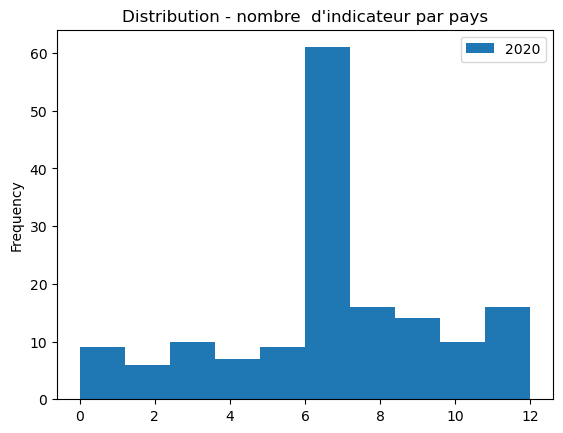

In [29]:
df_nb_indicators_by_country.plot(kind="hist", title="Distribution - nombre  d'indicateur par pays");

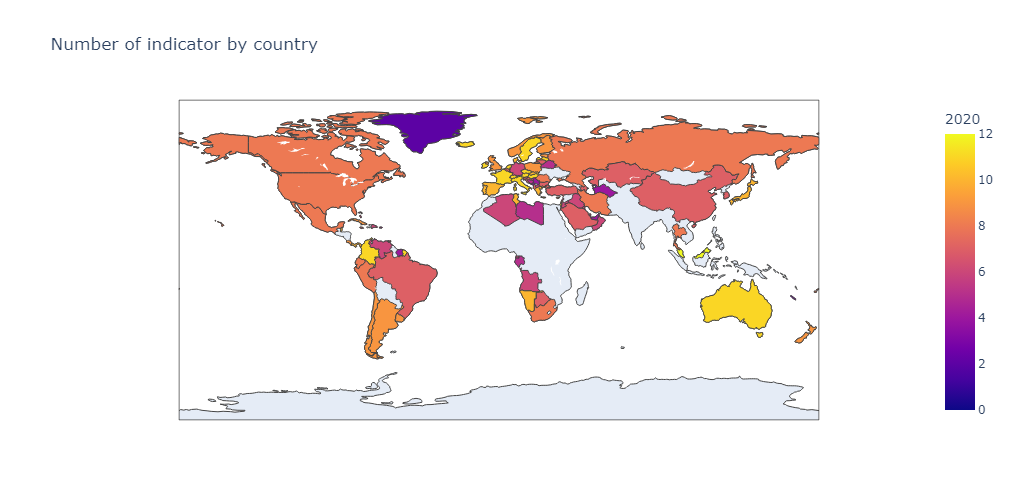

In [28]:
# La carte des pays selon le nombre d'indicateurs disponible
px.choropleth(df_nb_indicators_by_country,               
              locations="country_code",               
              color="2020",
              # hover_name="country_name",
              hover_data=["region", "country_name", "country_code"],
              animation_frame=None,    
              color_continuous_scale='Plasma',  
              height=500,
              width=None,
              title="Number of indicator by country",
              #range_color=(0, 12),
)

In [26]:
# On va utiliser le quantile d'ordre 1(25%) du nombre d'indicateur disponoble pour filtrer les pays

q1 = df_nb_indicators_by_country.quantile(.25).values[0]
q1

5.0

In [30]:
# countries that have less than 5 indicators, ces pays ne contiennent pas suffisament d'indicateurs pour l'analyse
less_than_1rs_quartile_indicators = df_nb_indicators_by_country.loc[df_nb_indicators_by_country["2020"] <= q1,
                                                                    "country_name"]
display(less_than_1rs_quartile_indicators)

data = data.loc[~data.country_name.isin(less_than_1rs_quartile_indicators)]

0                 American Samoa
5               French Polynesia
6                           Guam
7           Hong Kong SAR, China
12              Marshall Islands
13                 New Caledonia
15      Northern Mariana Islands
16                         Palau
17                     Singapore
20                        Tuvalu
22                       Andorra
25                       Belarus
27        Bosnia and Herzegovina
29               Channel Islands
35                 Faroe Islands
40                     Greenland
44                   Isle of Man
48                 Liechtenstein
52                        Monaco
53                    Montenegro
60                    San Marino
61                        Serbia
68                  Turkmenistan
77                Cayman Islands
82                       Curacao
83                      Dominica
86                       Grenada
91                   Puerto Rico
92     Sint Maarten (Dutch part)
95      St. Martin (French part)
97        

In [31]:
data.describe(include="all")

country_name country_code  \
count          1404         1404   
unique          117          117   
top      Arab World          ARB   
freq             12           12   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                                           indicator_name  \
count                                                                1404   
unique                                                                 12   
top     Expenditure on education as % of total government expenditure (%)   
freq                                                                  117   
mean                                                                  NaN   
std                                                                   NaN   
min                                                                   NaN   
25%                                                                   NaN   
50%                                                                   NaN   
75%                                                                   NaN   
max                                                                   NaN   

           indicator_code          2020  short_name  table_name   long_name  \
count                1404  9.150000e+02        1404        1404        1404   
unique                 12           NaN         117         117         117   
top     SE.XPD.TOTL.GB.ZS           NaN  Arab World  Arab World  Arab World   
freq                  117           NaN          12          12          12   
mean                  NaN  4.194025e+07         NaN         NaN         NaN   
std                   NaN  3.483212e+08         NaN         NaN         NaN   
min                   NaN  1.670000e-03         NaN         NaN         NaN   
25%                   NaN  8.327495e+00         NaN         NaN         NaN   
50%                   NaN  5.159572e+01         NaN         NaN         NaN   
75%                   NaN  1.917860e+03         NaN         NaN         NaN   
max                   NaN  6.118075e+09         NaN         NaN         NaN   

       2_alpha_code currency_unit  \
count          1392          1104   
unique          116            72   
top              1A          Euro   
freq             12           204   
mean            NaN           NaN   
std             NaN           NaN   
min             NaN           NaN   
25%             NaN           NaN   
50%             NaN           NaN   
75%             NaN           NaN   
max             NaN           NaN   

                                                                                                                                                   special_notes  \
count                                                                                                                                                        972   
unique                                                                                                                                                        74   
top     April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.   
freq                                                                                                                                                          48   
mean                                                                                                                                                         NaN   
std                                                                                                                                                          NaN   
min                                                                                                        

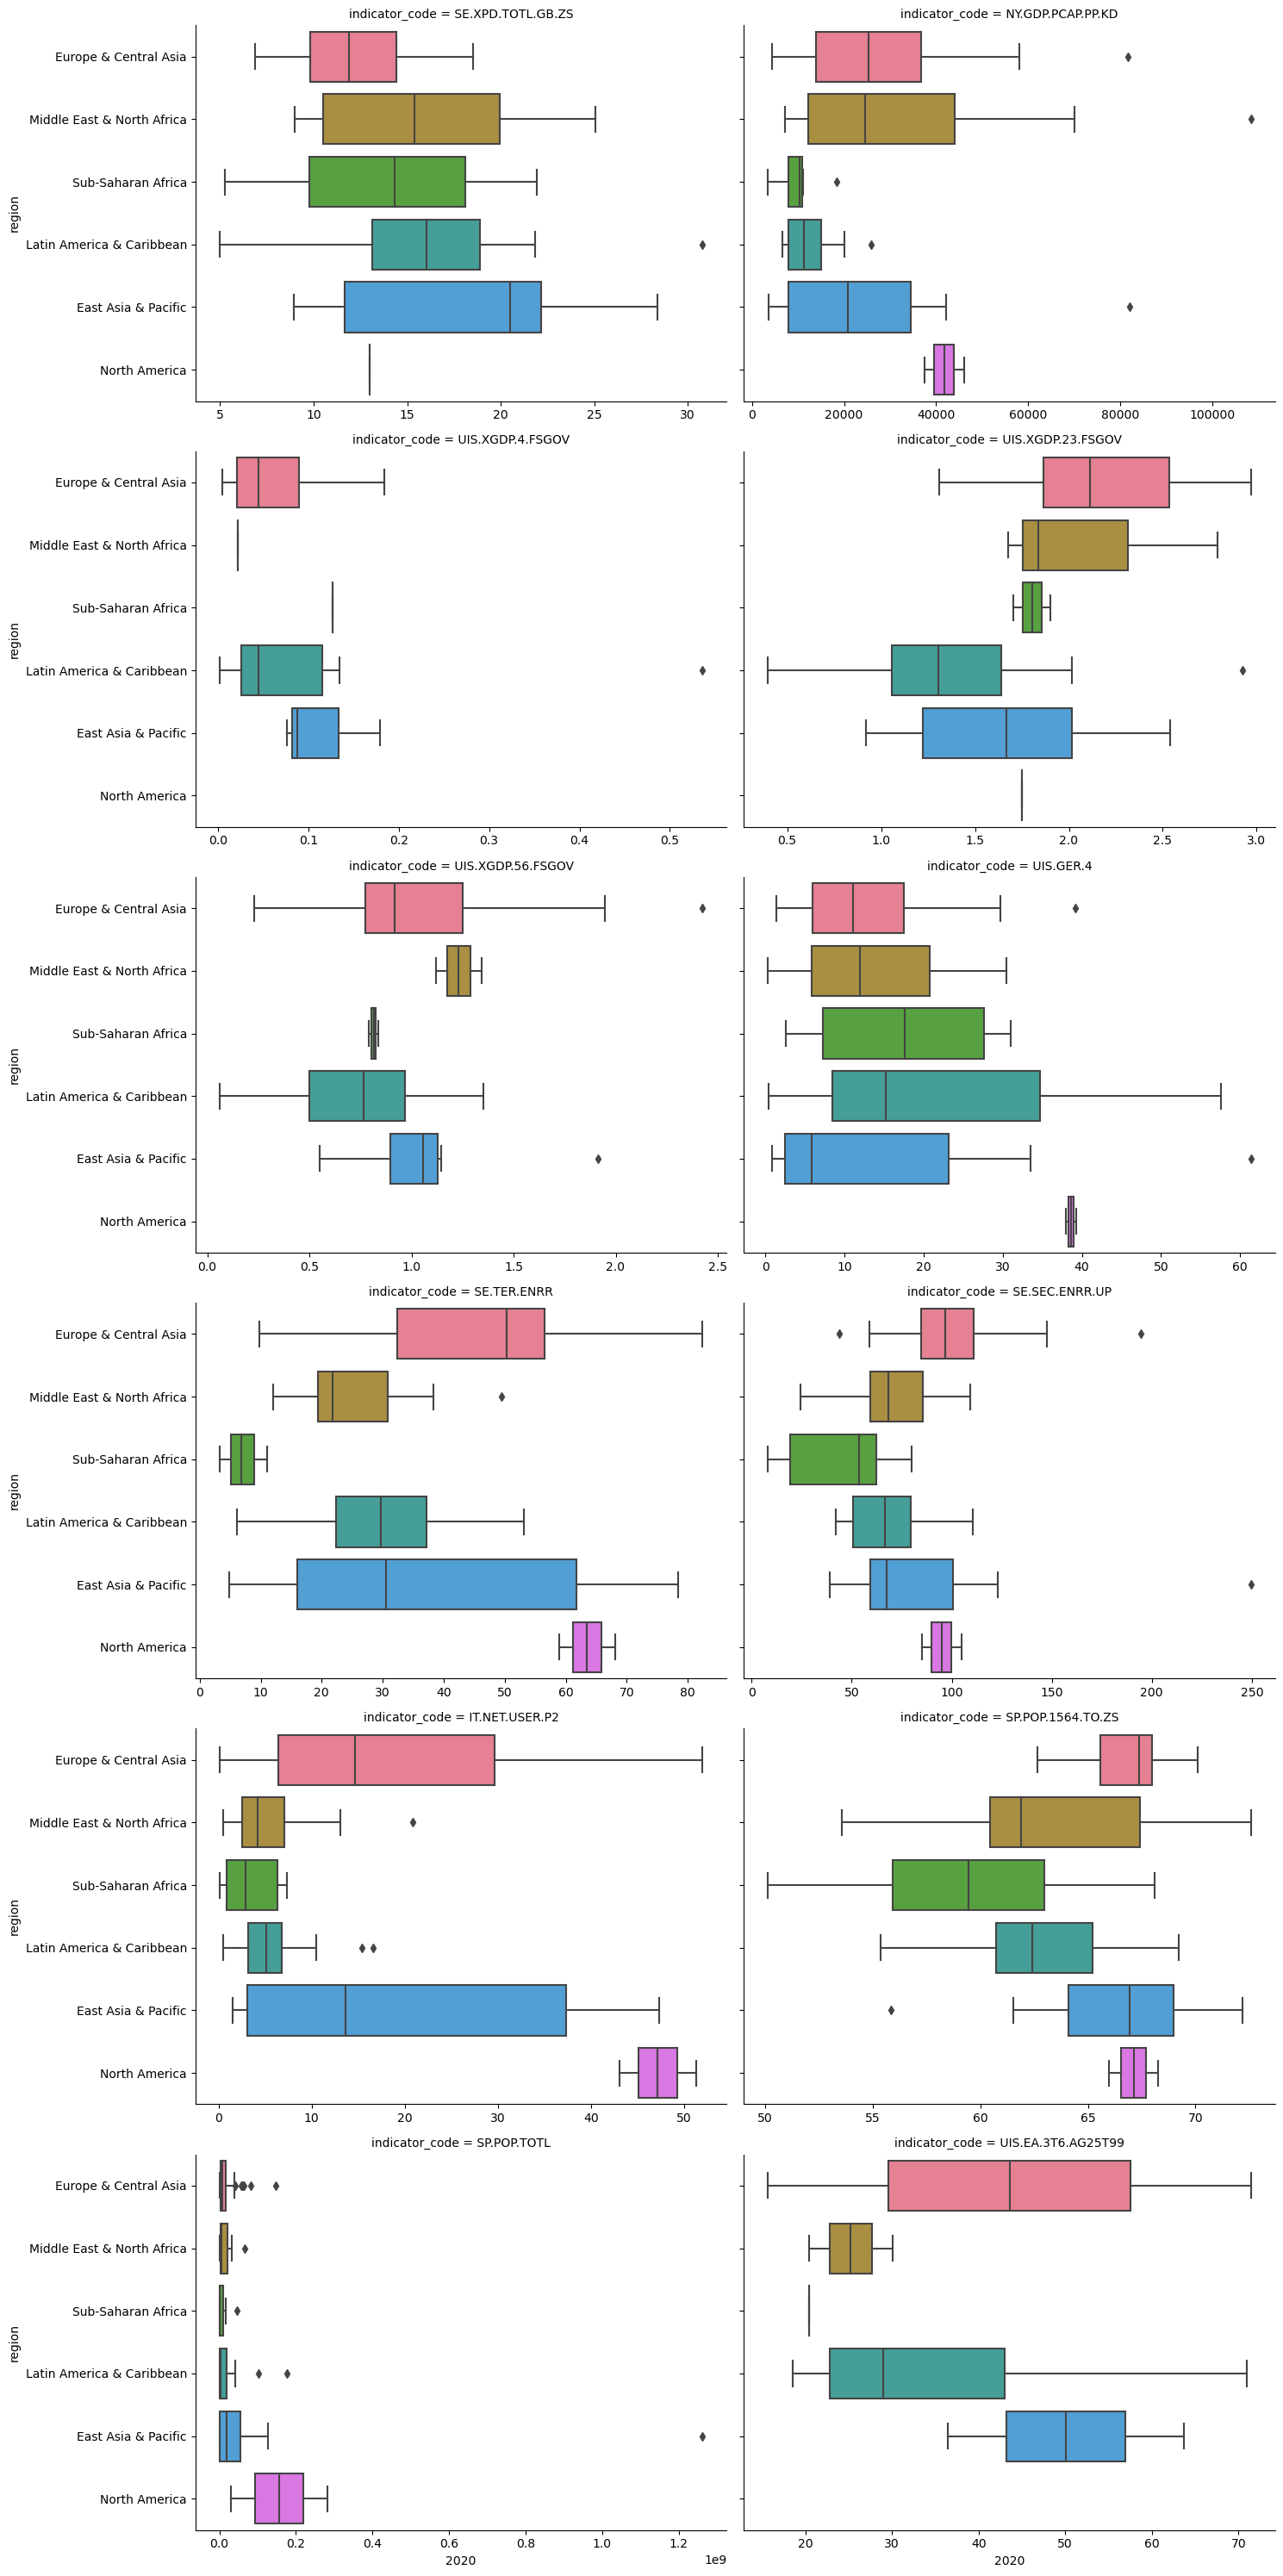

In [32]:
sns.catplot(data=data, y='region', x='2020', col='indicator_code',
            height=5, aspect=1.5, palette="husl", orient="h",
            col_wrap=2, kind="box", sharex=False, sharey=True);

In [33]:
# topn (n=10) of country by indicator: On a ainsi le top des 10 pays par indicateur
TOPN = 10
df_country_by_indicator = (data
                           .groupby(['indicator_name'], as_index=True, dropna=False)
                           [['region', 'country_name', '2020']]
                           .apply(lambda x: x.nlargest(TOPN, columns=['2020'], keep="all"))
                           .reset_index()
                           )

df_country_by_indicator

indicator_name  \
0                                                     Expenditure on education as % of total government expenditure (%)   
1                                                     Expenditure on education as % of total government expenditure (%)   
2                                                     Expenditure on education as % of total government expenditure (%)   
3                                                     Expenditure on education as % of total government expenditure (%)   
4                                                     Expenditure on education as % of total government expenditure (%)   
..                                                                                                                  ...   
115  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
116  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
117  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
118  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   
119  UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Total   

     level_1                      region                    country_name  \
0       2496   Latin America & Caribbean  St. Vincent and the Grenadines   
1       2604         East Asia & Pacific                        Thailand   
2       2664  Middle East & North Africa                         Tunisia   
3       2640         East Asia & Pacific                           Tonga   
4       1932          Sub-Saharan Africa                         Namibia   
..       ...                         ...                             ...   
115     2291  Middle East & North Africa                    Saudi Arabia   
116      503   Latin America & Caribbean                        Barbados   
117     1787  Middle East & North Africa                           Malta   
118     1823          Sub-Saharan Africa                       Mauritius   
119     1835   Latin America & Caribbean                          Mexico   

          2020  
0    30.789200  
1    28.388599  
2    25.047310  
3    22.955860  
4    21.925060  
..         ...  
115  30.066601  
116  24.205730  
117  20.398439  
118  20.398439  
119  18.577311  

[120 rows x 5 columns]

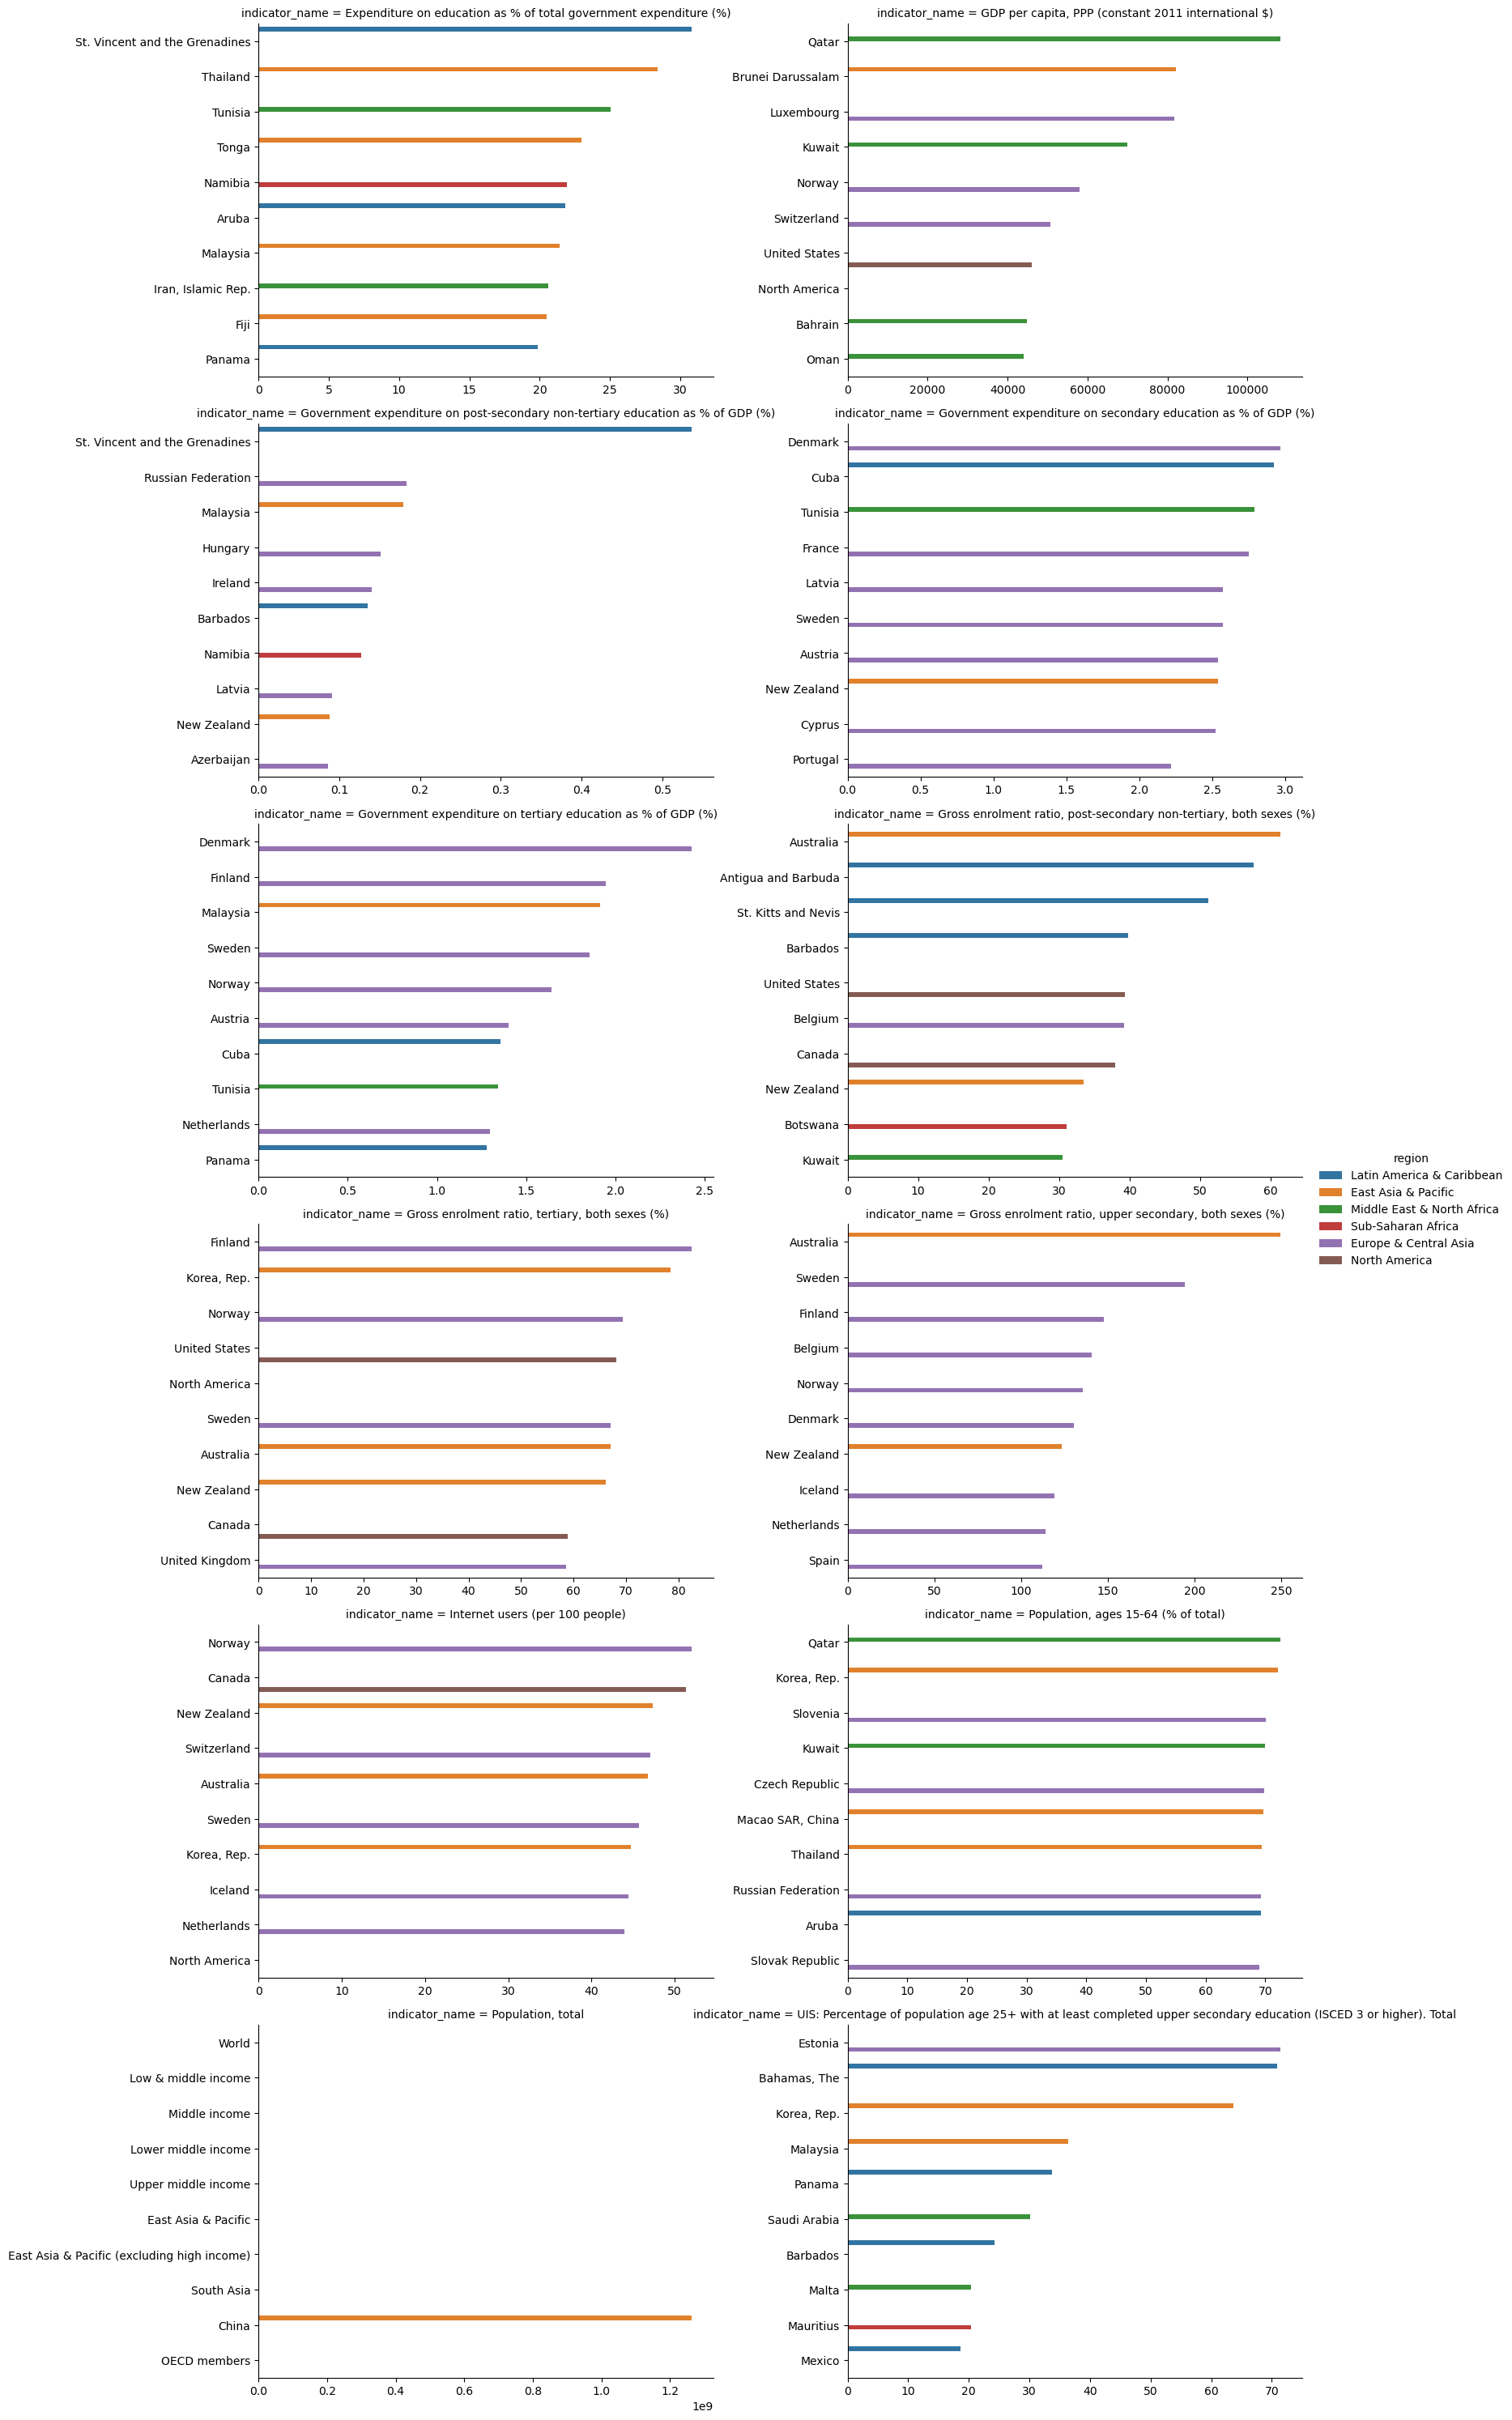

In [34]:
#Plot des pays dans le top10
g = sns.catplot(data=df_country_by_indicator,
            y="country_name",
            x="2020",
            kind="bar",
            orient="h",
            height=5,
            aspect=1.7,
            hue="region",
            col="indicator_name",
            col_wrap=2,
            sharey=False,
            sharex=False,
           )
g.set_axis_labels("", "")

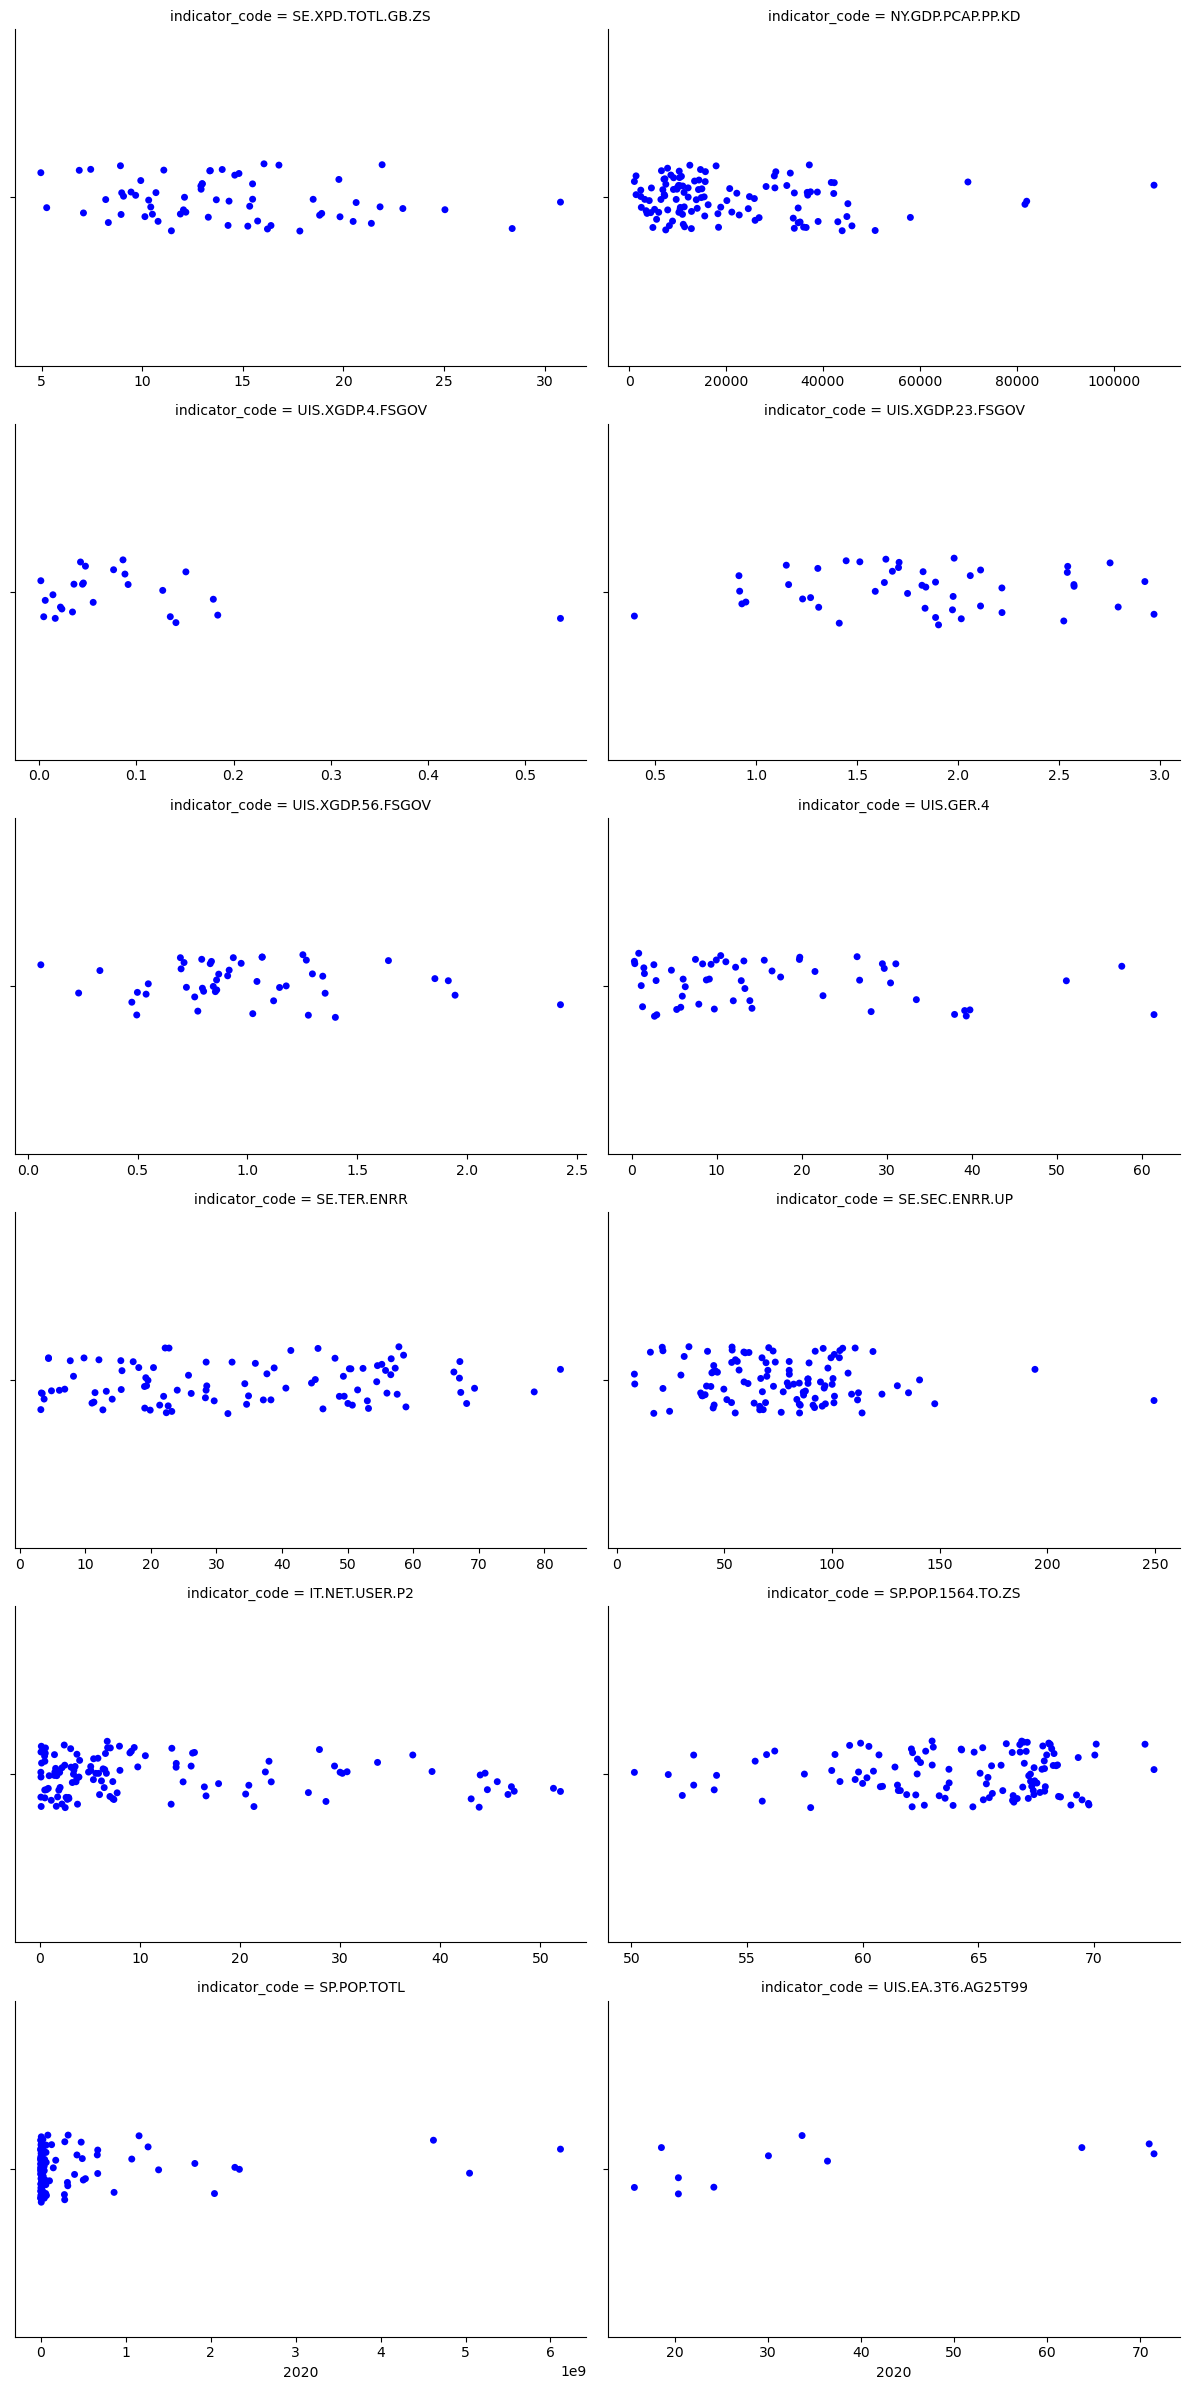

In [36]:
# Nuage de poins des pays pour chaque variable
sns.catplot(data=data, 
            x="2020",
            col="indicator_code",
            kind="strip",
            orient="h",
            height=4,
            aspect=1.5,
            col_wrap=2,
            sharex=False,
            color="blue",
           );

# Remarques
La disposition des variables ne permet pas une bonne analyse statistique car ce sont les indicateurs qui constituent nos variables danalyse.
Il faut donc que les indicateurs soient en colonne et les pays en ligne. Ainsi la commande pivot de la balise pandas sera utilisée. Elle fonctionne exactement comme la commande reshape sur stata. Ainsi nous obtenons une base qui nous renseigne pour chaque pays ou zone les différents indicateurs. La commande pivot nous a facilité ici la tache au lieu de procéder à des manipulation longues. Implicitement, nous allons éliminer plusieurs colonnes qui ne contenaient jusque là que des métadonnées(des informations sur les calcul des indicateurs).

In [48]:
# Create a spreadsheet-style pivot table as a DataFrame.
data_pivot = pd.pivot_table(data=data,
                            index=["region", "country_name", "country_code"],
                            values='2020',
                            columns='indicator_code').reset_index()
print(f"Data shape: {data_pivot.shape}")
data_pivot.head()

Data shape: (92, 15)


indicator_code               region       country_name country_code  \
0               East Asia & Pacific          Australia          AUS   
1               East Asia & Pacific  Brunei Darussalam          BRN   
2               East Asia & Pacific              China          CHN   
3               East Asia & Pacific               Fiji          FJI   
4               East Asia & Pacific              Japan          JPN   

indicator_code  IT.NET.USER.P2  NY.GDP.PCAP.PP.KD  SE.SEC.ENRR.UP  \
0                    46.756116       35281.395362      249.607498   
1                     8.996285       82049.580860       67.462151   
2                     1.775913        3700.743648       38.959030   
3                     1.496855        6673.847391       59.116379   
4                    29.990740       33871.843545      100.454224   

indicator_code  SE.TER.ENRR  SE.XPD.TOTL.GB.ZS  SP.POP.1564.TO.ZS  \
0                  67.03891          13.360160          66.788576   
1                  12.69113           8.920740          66.955147   
2                   7.72048                NaN          68.462574   
3                       NaN          20.484921          61.538812   
4                  48.73653           9.930410          68.232188   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
0               1.915300e+07                 NaN  61.390049   
1               3.332410e+05                 NaN   1.296230   
2               1.262645e+09                 NaN   5.307240   
3               8.112230e+05                 NaN   2.885000   
4               1.268430e+08                 NaN   0.844730   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  
0                         1.88884           0.07649            1.14633  
1                             NaN               NaN                NaN  
2                             NaN               NaN                NaN  
3                             NaN               NaN            0.84457  
4                         1.44606               NaN            0.54858

In [49]:
# Description de la nouvelle base
data_pivot.describe(include="all")

indicator_code                 region country_name country_code  \
count                              92           92           92   
unique                              6           92           92   
top             Europe & Central Asia    Australia          AUS   
freq                               36            1            1   
mean                              NaN          NaN          NaN   
std                               NaN          NaN          NaN   
min                               NaN          NaN          NaN   
25%                               NaN          NaN          NaN   
50%                               NaN          NaN          NaN   
75%                               NaN          NaN          NaN   
max                               NaN          NaN          NaN   

indicator_code  IT.NET.USER.P2  NY.GDP.PCAP.PP.KD  SE.SEC.ENRR.UP  \
count                91.000000          90.000000       84.000000   
unique                     NaN                NaN             NaN   
top                        NaN                NaN             NaN   
freq                       NaN                NaN             NaN   
mean                 13.456444       23297.936342       81.920940   
std                  14.729495       18997.157329       35.704867   
min                   0.105046        3508.905125        8.165120   
25%                   3.180408       10260.927062       59.539659   
50%                   6.731396       15654.111790       80.134777   
75%                  17.225234       34689.708142       98.578098   
max                  52.000000      108323.903919      249.607498   

indicator_code  SE.TER.ENRR  SE.XPD.TOTL.GB.ZS  SP.POP.1564.TO.ZS  \
count             69.000000          63.000000          91.000000   
unique                  NaN                NaN                NaN   
top                     NaN                NaN                NaN   
freq                    NaN                NaN                NaN   
mean              38.041727          14.193053          64.749554   
std               19.611261           5.344908           4.236421   
min                3.234750           4.964300          50.130735   
25%               22.362659          10.375395          62.227768   
50%               37.147419          13.360160          65.567704   
75%               54.428761          16.599045          67.859249   
max               82.439072          30.789200          72.588714   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
count           9.200000e+01           11.000000  56.000000   
unique                   NaN                 NaN        NaN   
top                      NaN                 NaN        NaN   
freq                     NaN                 NaN        NaN   
mean            3.592016e+07           36.865614  16.628987   
std             1.359502e+08           21.497669  14.870619   
min             4.537400e+04           15.675070   0.335280   
25%             1.645501e+06           20.398439   5.921795   
50%             6.736625e+06           30.066601  12.091540   
75%             2.379614e+07           50.060844  26.575469   
max             1.262645e+09           71.459663  61.390049   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  
count                   46.000000         25.000000          47.000000  
unique                        NaN               NaN                NaN  
top                           NaN               NaN                NaN  
freq                          NaN               NaN                NaN  
mean                     1.814862          0.087523           0.983590  
std                      0.587587          0.108619           0.455717  
min                      0.397710          0.001670           0.059390  
25%                      1.420477          0.023290           0.741090  
50%                      1.831825          0.047550           0.869290  
75%                      2.111583          0.12703

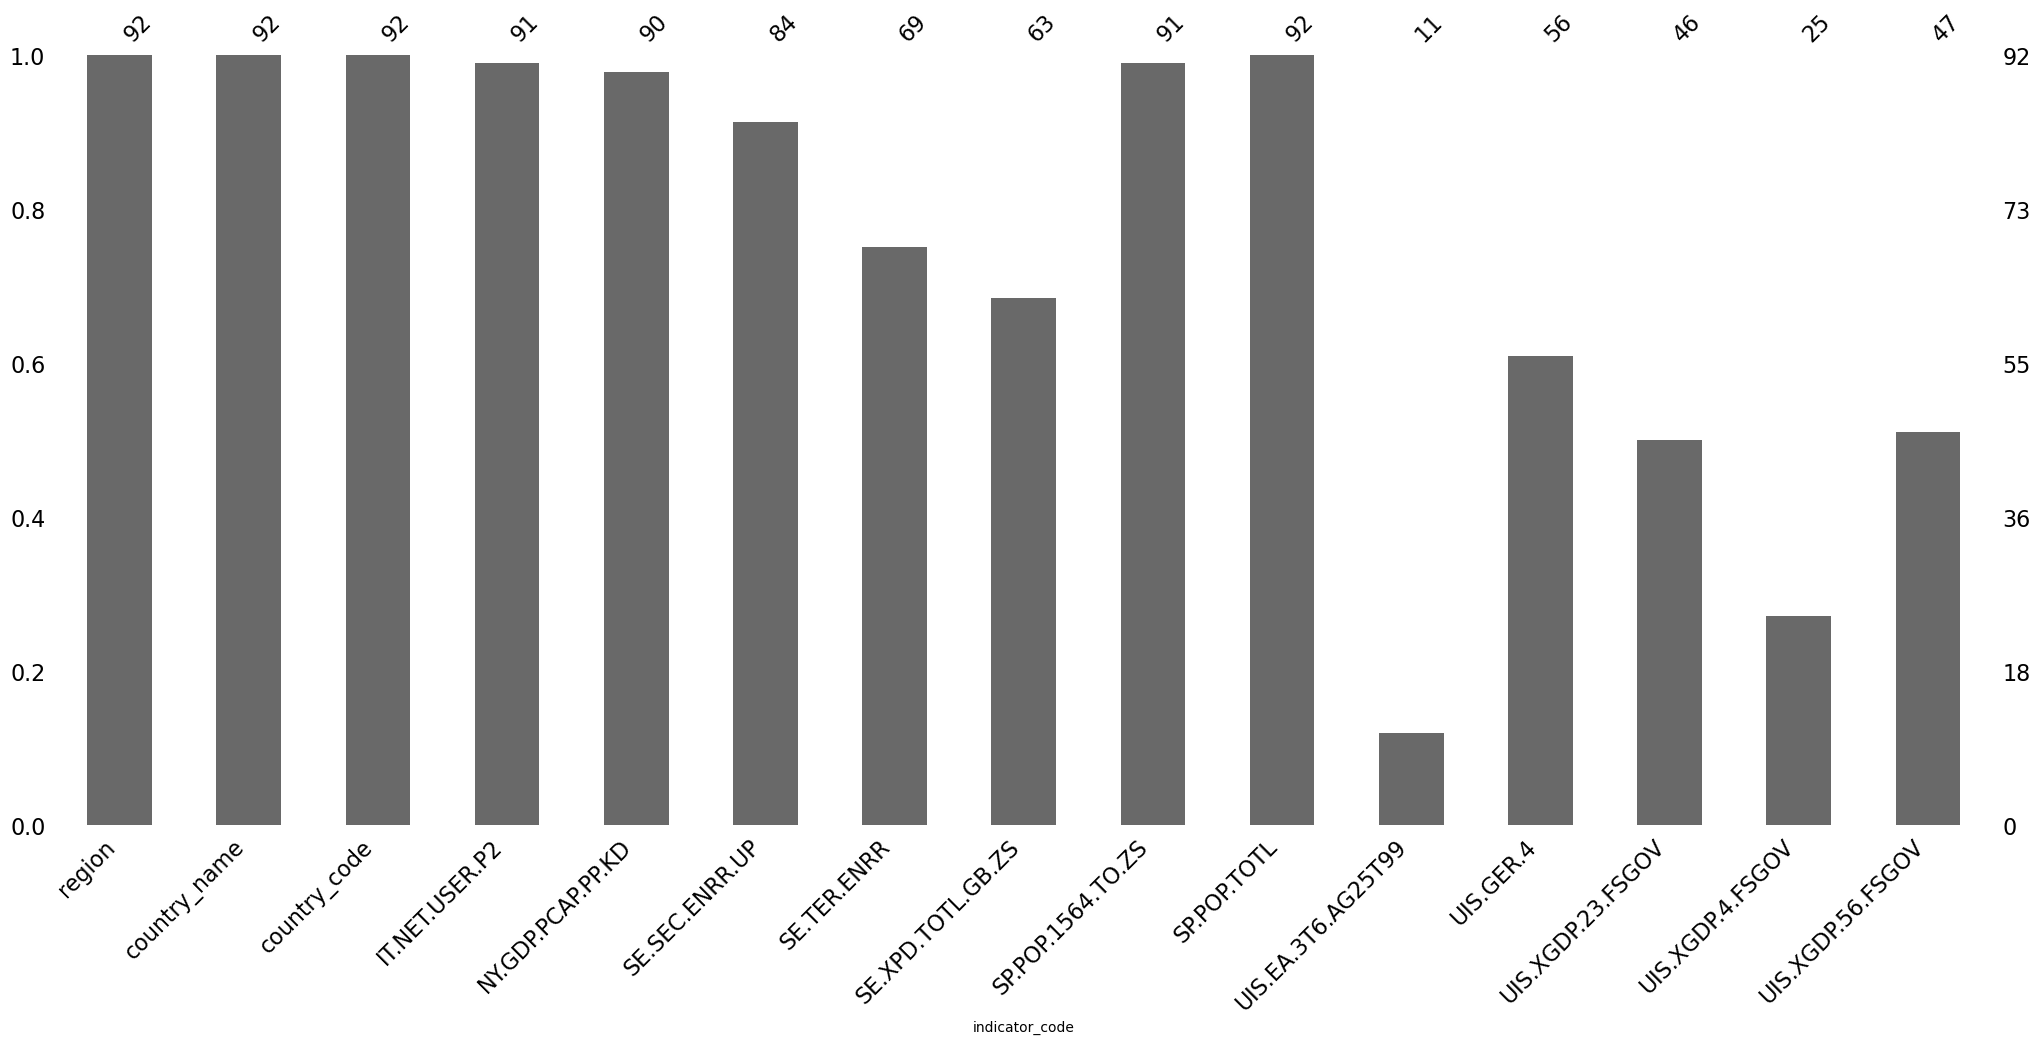

In [50]:
#Visualisons à nouveau les valeurs manquantes de la base
msno.bar(data_pivot);

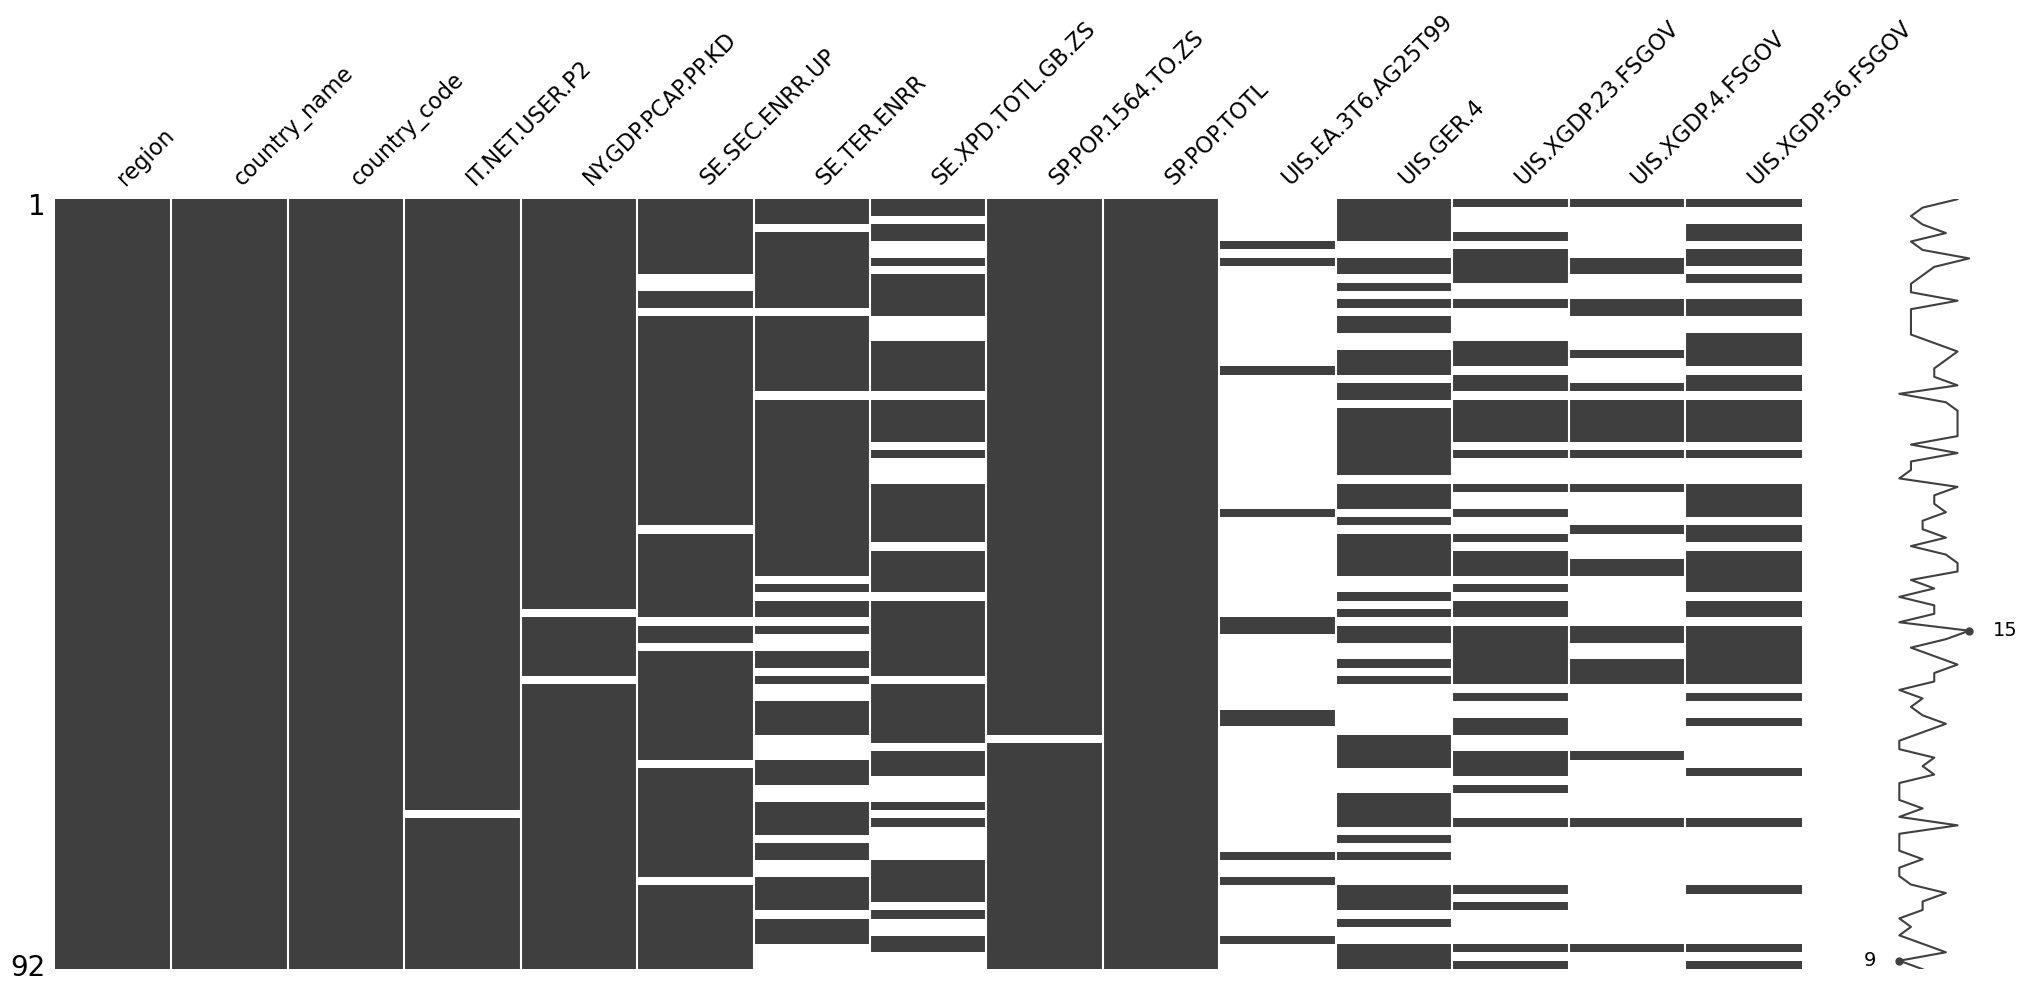

In [51]:
msno.matrix(data_pivot);

### Recupération des indicateurs / Création de nouvelles variables

In [61]:
#liste des variables(indicteurs) de data_pivot
indicators = ['IT.NET.USER.P2',  # internet
              "NY.GDP.PCAP.PP.KD", # GDP
              "SP.POP.1564.TO.ZS", # population
              # enrolment
              "SE.SEC.ENRR.UP",
              "SE.TER.ENRR",
              "UIS.GER.4",
              # expenditure
              "SE.XPD.TOTL.GB.ZS",
              "UIS.XGDP.23.FSGOV",
              "UIS.XGDP.4.FSGOV",
              "UIS.XGDP.56.FSGOV",
             ]
len(indicators)

10

In [63]:
# Création de nouvelles variables
# total_enrolment= moyenne des trois taux de scolarisation( secondaire,post-secondaire non-supérieur, supérieur)
# gov_expenditure= somme des dépenses du gouvernement( secondaire,post-secondaire non-supérieur, supérieur)
# Renommer les variables(indicateurs) SE.XPD.TOTL.GB.ZS ; IT.NET.USER.P2 ; NY.GDP.PCAP.PP.KD .
data_pivot = (data_pivot
              .assign(total_enrolment=lambda dframe: dframe[["SE.SEC.ENRR.UP", "SE.TER.ENRR", "UIS.GER.4"]
                                                           ].mean(axis=1),
                      gov_expenditure=lambda dframe: (dframe["UIS.XGDP.23.FSGOV"]
                                                      + dframe["UIS.XGDP.4.FSGOV"]
                                                      + dframe["UIS.XGDP.56.FSGOV"]
                                                     ),
                     )
              .rename(columns={"SE.XPD.TOTL.GB.ZS": "percent_education_total_gov_expenditure",
                               "IT.NET.USER.P2": "internet_users",
                               "NY.GDP.PCAP.PP.KD": "gdp_per_capita"})
             )
data_pivot.head()

indicator_code               region       country_name country_code  \
0               East Asia & Pacific          Australia          AUS   
1               East Asia & Pacific  Brunei Darussalam          BRN   
2               East Asia & Pacific              China          CHN   
3               East Asia & Pacific               Fiji          FJI   
4               East Asia & Pacific              Japan          JPN   

indicator_code  internet_users  gdp_per_capita  SE.SEC.ENRR.UP  SE.TER.ENRR  \
0                    46.756116    35281.395362      249.607498     67.03891   
1                     8.996285    82049.580860       67.462151     12.69113   
2                     1.775913     3700.743648       38.959030      7.72048   
3                     1.496855     6673.847391       59.116379          NaN   
4                    29.990740    33871.843545      100.454224     48.73653   

indicator_code  percent_education_total_gov_expenditure  SP.POP.1564.TO.ZS  \
0                                             13.360160          66.788576   
1                                              8.920740          66.955147   
2                                                   NaN          68.462574   
3                                             20.484921          61.538812   
4                                              9.930410          68.232188   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
0               1.915300e+07                 NaN  61.390049   
1               3.332410e+05                 NaN   1.296230   
2               1.262645e+09                 NaN   5.307240   
3               8.112230e+05                 NaN   2.885000   
4               1.268430e+08                 NaN   0.844730   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  \
0                         1.88884           0.07649            1.14633   
1                             NaN               NaN                NaN   
2                             NaN               NaN                NaN   
3                             NaN               NaN            0.84457   
4                         1.44606               NaN            0.54858   

indicator_code  total_enrolment  gov_expenditure  
0                    126.012152          3.11166  
1                     27.149837              NaN  
2                     17.328917              NaN  
3                     31.000689              NaN  
4                     50.011828              NaN

In [64]:
# Visualisation ( carte des variables )
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_geo = f'{url}/world-countries.json'

In [65]:
for col_name in ['internet_users',
                 "gdp_per_capita",
                 "total_enrolment",
                 "gov_expenditure",
                 "percent_education_total_gov_expenditure",
                ]:
    m = folium.Map(location=[0, 0], zoom_start=1)
    folium.Choropleth(geo_data=country_geo,
                  data=data_pivot,
                  columns=['country_code', col_name],
                  key_on='feature.id',
                  name="choropleth",
                  fill_color='BuPu',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name=col_name,
                  nan_fill_color="black",
                  highlight=True,
                 ).add_to(m)
    display(m)

In [57]:
# Affichage des premières lignes de data_pivot
data_pivot.head()

indicator_code               region       country_name country_code  \
0               East Asia & Pacific          Australia          AUS   
1               East Asia & Pacific  Brunei Darussalam          BRN   
2               East Asia & Pacific              China          CHN   
3               East Asia & Pacific               Fiji          FJI   
4               East Asia & Pacific              Japan          JPN   

indicator_code  internet_users  gdp_per_capita  SE.SEC.ENRR.UP  SE.TER.ENRR  \
0                    46.756116    35281.395362      249.607498     67.03891   
1                     8.996285    82049.580860       67.462151     12.69113   
2                     1.775913     3700.743648       38.959030      7.72048   
3                     1.496855     6673.847391       59.116379          NaN   
4                    29.990740    33871.843545      100.454224     48.73653   

indicator_code  percent_education_total_gov_expenditure  SP.POP.1564.TO.ZS  \
0                                             13.360160          66.788576   
1                                              8.920740          66.955147   
2                                                   NaN          68.462574   
3                                             20.484921          61.538812   
4                                              9.930410          68.232188   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
0               1.915300e+07                 NaN  61.390049   
1               3.332410e+05                 NaN   1.296230   
2               1.262645e+09                 NaN   5.307240   
3               8.112230e+05                 NaN   2.885000   
4               1.268430e+08                 NaN   0.844730   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  \
0                         1.88884           0.07649            1.14633   
1                             NaN               NaN                NaN   
2                             NaN               NaN                NaN   
3                             NaN               NaN            0.84457   
4                         1.44606               NaN            0.54858   

indicator_code  total_enrolment  gov_expenditure  
0                    126.012152          3.11166  
1                     27.149837              NaN  
2                     17.328917              NaN  
3                     31.000689              NaN  
4                     50.011828              NaN

## Scoring/ la partie décisionnelle pour l'investissement

Dans cette partie, nous allons construire un score d'attractivité. Celui-ci nous permettra d'ordonner les pays en fonction de leur attractivité en terme d'investissement dans l'éducation.

Pour ce faire nous allons utiliser deux methodes, la première est une pondération et la deuxième est une analyse en composante principale.

In [99]:
# Ici on s'intéresse aux variables clés : le nombre d'utilisateurs d'internet, le PIB par habitant, 
# le taux moyen de scolarisation et les dépenses totales du gouvernement dans l'éducation(en %).
# La liste des indicateurs pour le score d'attractivité

list_features = ["internet_users",
                 "gdp_per_capita",
                 "total_enrolment",
                 "percent_education_total_gov_expenditure",
                ]

In [100]:
# Définition de la fonction Scoring
def scoring(dframe: pd.DataFrame,
           features_weight: Dict[str, float]
           ) -> float:
    """ Country attractivity score
    
    Args:
        dframe (pd.DataFrame): data frame
    
    Returns:
        float: attractivity score
    
    """
    score = 0
    for col_name, weight in features_weight.items():
        score += weight * dframe[col_name]
        
    return score

### Méthode de Pondération

In [101]:
# internet users stats
internet_stat = data_pivot["internet_users"].describe(percentiles=np.arange(0, 1, 0.1))
internet_stat

count    92.000000
mean     13.355744
std      14.680149
min       0.105046
0%        0.105046
10%       1.511643
20%       2.774729
30%       3.693737
40%       5.542655
50%       6.688139
60%       8.597771
70%      14.869559
80%      23.066165
90%      42.688489
max      52.000000
Name: internet_users, dtype: float64

In [102]:
# filter out all coutries that have internet_users less thant 80% decile
data_custom = data_pivot.loc[data_pivot["internet_users"] >= internet_stat.loc["70%"], :].copy()
data_custom.country_name.unique()

array(['Australia', 'Japan', 'Korea, Rep.', 'Malaysia', 'New Zealand',
       'Austria', 'Belgium', 'Cyprus', 'Denmark', 'Estonia', 'Finland',
       'Germany', 'Iceland', 'Ireland', 'Italy', 'Luxembourg',
       'Netherlands', 'Norway', 'Portugal', 'Slovenia', 'Sweden',
       'Switzerland', 'United Kingdom', 'Aruba', 'Chile', 'Israel',
       'Canada', 'United States'], dtype=object)

In [103]:
data_custom.head()

indicator_code               region country_name country_code  internet_users  \
0               East Asia & Pacific    Australia          AUS       46.756116   
4               East Asia & Pacific        Japan          JPN       29.990740   
5               East Asia & Pacific  Korea, Rep.          KOR       44.700000   
7               East Asia & Pacific     Malaysia          MYS       21.384731   
8               East Asia & Pacific  New Zealand          NZL       47.379557   

indicator_code  gdp_per_capita  SE.SEC.ENRR.UP  SE.TER.ENRR  \
0                 35281.395362      249.607498    67.038910   
4                 33871.843545      100.454224    48.736530   
5                 20756.779897       95.884689    78.436157   
7                 16309.967988       45.810822    25.742260   
8                 28264.565116      123.198380    66.192177   

indicator_code  percent_education_total_gov_expenditure  SP.POP.1564.TO.ZS  \
0                                             13.360160          66.788576   
4                                              9.930410          68.232188   
5                                             20.484921          72.199592   
7                                             21.390680          62.719942   
8                                             20.484921          65.468325   

indicator_code  SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  UIS.XGDP.23.FSGOV  \
0                19153000.0                 NaN  61.390049            1.88884   
4               126843000.0                 NaN   0.844730            1.44606   
5                47008111.0           63.714600        NaN                NaN   
7                23185608.0           36.407089  19.770599            2.06063   
8                 3857700.0                 NaN  33.464970            2.54104   

indicator_code  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  total_enrolment  \
0                        0.07649            1.14633       126.012152   
4                            NaN            0.54858        50.011828   
5                            NaN                NaN        87.160423   
7                        0.17907            1.91465        30.441227   
8                        0.08818                NaN        74.285175   

indicator_code  gov_expenditure  
0                       3.11166  
4                           NaN  
5                           NaN  
7                       4.15435  
8                           NaN

In [104]:
# higher value, higher percentile rank

data_custom.loc[:, list_features] = data_custom.loc[:, list_features
                                                   ].rank(pct=True, ascending=True, na_option="keep") * 100

data_custom.head()

indicator_code               region country_name country_code  internet_users  \
0               East Asia & Pacific    Australia          AUS       85.714286   
4               East Asia & Pacific        Japan          JPN       50.000000   
5               East Asia & Pacific  Korea, Rep.          KOR       78.571429   
7               East Asia & Pacific     Malaysia          MYS       28.571429   
8               East Asia & Pacific  New Zealand          NZL       92.857143   

indicator_code  gdp_per_capita  SE.SEC.ENRR.UP  SE.TER.ENRR  \
0                    53.571429      249.607498    67.038910   
4                    42.857143      100.454224    48.736530   
5                    17.857143       95.884689    78.436157   
7                    14.285714       45.810822    25.742260   
8                    32.142857      123.198380    66.192177   

indicator_code  percent_education_total_gov_expenditure  SP.POP.1564.TO.ZS  \
0                                             57.142857          66.788576   
4                                              7.142857          68.232188   
5                                             91.071429          72.199592   
7                                             96.428571          62.719942   
8                                             91.071429          65.468325   

indicator_code  SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  UIS.XGDP.23.FSGOV  \
0                19153000.0                 NaN  61.390049            1.88884   
4               126843000.0                 NaN   0.844730            1.44606   
5                47008111.0           63.714600        NaN                NaN   
7                23185608.0           36.407089  19.770599            2.06063   
8                 3857700.0                 NaN  33.464970            2.54104   

indicator_code  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  total_enrolment  \
0                        0.07649            1.14633       100.000000   
4                            NaN            0.54858        21.428571   
5                            NaN                NaN        89.285714   
7                        0.17907            1.91465         3.571429   
8                        0.08818                NaN        78.571429   

indicator_code  gov_expenditure  
0                       3.11166  
4                           NaN  
5                           NaN  
7                       4.15435  
8                           NaN

In [105]:
# Il s'agit d'affecter des coefficients( poids) à chaque variable en fonction de son importance que nous considerons.
# custom weighted

weigthed = {"internet_users": .4,
            "total_enrolment": .25,
            "gdp_per_capita": .25,
            "percent_education_total_gov_expenditure": .1,
           }


data_custom = (data_custom
               .assign(attractivity_score_custom=
                       lambda dframe: dframe.apply(scoring, features_weight=weigthed, axis=1))
               .reset_index()
              )
data_custom[list_features + ["attractivity_score_custom"]].head()

indicator_code  internet_users  gdp_per_capita  total_enrolment  \
0                    85.714286       53.571429       100.000000   
1                    50.000000       42.857143        21.428571   
2                    78.571429       17.857143        89.285714   
3                    28.571429       14.285714         3.571429   
4                    92.857143       32.142857        78.571429   

indicator_code  percent_education_total_gov_expenditure  \
0                                             57.142857   
1                                              7.142857   
2                                             91.071429   
3                                             96.428571   
4                                             91.071429   

indicator_code  attractivity_score_custom  
0                               78.392857  
1                               36.785714  
2                               67.321429  
3                               25.535714  
4                               73.928571

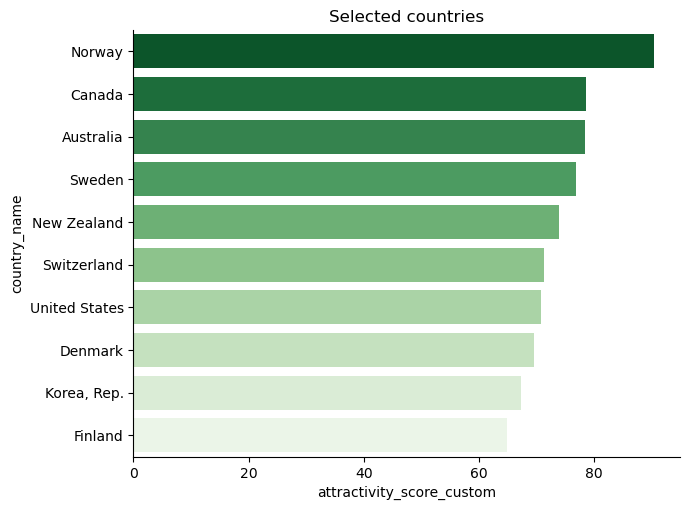

In [106]:
top_country_custom = data_custom.nlargest(TOPN, columns=["attractivity_score_custom"], keep="all")
g = sns.catplot(data=top_country_custom,
                kind="bar", orient="h", hue=None,
                y="country_name", x="attractivity_score_custom", estimator=np.mean,
                height=5, aspect=1.4, palette="Greens_r",
               )
g.ax.set_title("Selected countries");

### Méthode Statistique ACP

Dans cette partie nous allons mener une méthode d'analyse en composante principale

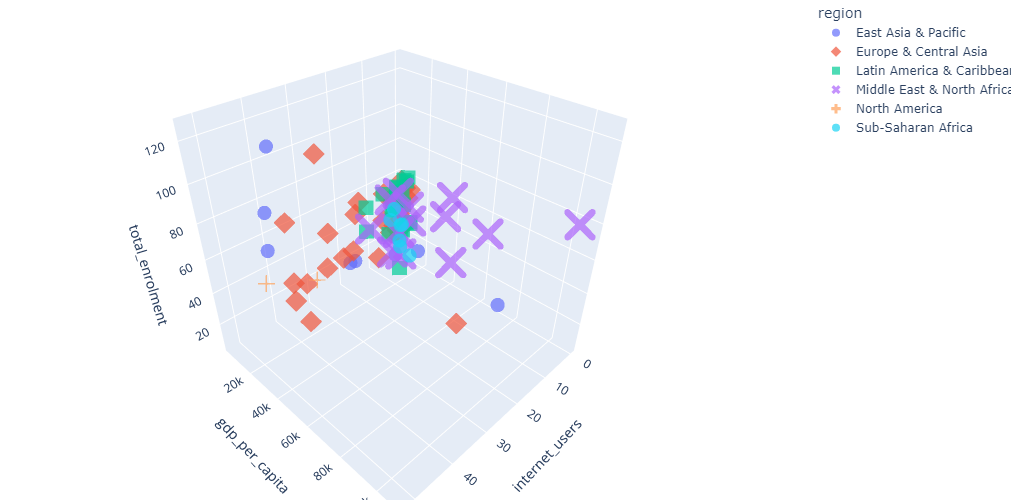

In [107]:
fig = px.scatter_3d(data_frame=data_pivot,
                    x="internet_users",
                    y="gdp_per_capita",
                    z='total_enrolment',
                    color='region',
                    hover_name="country_name",
                    symbol='region',
                    opacity=0.7,
                    width=800,
                    height=500,
                   )
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [110]:
# Définition de la fonction fillna( elle permettra d'imputer les valeurs manquantes par la médiane)
#

def fillna_by_group(data, groupby, columns, estimator="median"):
    """ Fill na by group
    
    Args:
        data (pd.DataFrame):
        groupby (Union[str, Sequence[str]]):
        columns (Union[str, Sequence[str]]):
        estimator (str):
    
    Return:
        pd.DataFrame
    
    """
    return data_pivot[columns].fillna(data_pivot.groupby(groupby)[columns].transform(estimator))

In [109]:
# Imputer les valeurs manquantes
data_pivot[list_features] = fillna_by_group(data=data_pivot,
                                            groupby="region",
                                            columns=list_features,
                                            estimator="median",
                                           )
data_pivot.head()

indicator_code               region       country_name country_code  \
0               East Asia & Pacific          Australia          AUS   
1               East Asia & Pacific  Brunei Darussalam          BRN   
2               East Asia & Pacific              China          CHN   
3               East Asia & Pacific               Fiji          FJI   
4               East Asia & Pacific              Japan          JPN   

indicator_code  internet_users  gdp_per_capita  SE.SEC.ENRR.UP  SE.TER.ENRR  \
0                    46.756116    35281.395362      249.607498     67.03891   
1                     8.996285    82049.580860       67.462151     12.69113   
2                     1.775913     3700.743648       38.959030      7.72048   
3                     1.496855     6673.847391       59.116379          NaN   
4                    29.990740    33871.843545      100.454224     48.73653   

indicator_code  percent_education_total_gov_expenditure  SP.POP.1564.TO.ZS  \
0                                             13.360160          66.788576   
1                                              8.920740          66.955147   
2                                             20.484921          68.462574   
3                                             20.484921          61.538812   
4                                              9.930410          68.232188   

indicator_code   SP.POP.TOTL  UIS.EA.3T6.AG25T99  UIS.GER.4  \
0               1.915300e+07                 NaN  61.390049   
1               3.332410e+05                 NaN   1.296230   
2               1.262645e+09                 NaN   5.307240   
3               8.112230e+05                 NaN   2.885000   
4               1.268430e+08                 NaN   0.844730   

indicator_code  UIS.XGDP.23.FSGOV  UIS.XGDP.4.FSGOV  UIS.XGDP.56.FSGOV  \
0                         1.88884           0.07649            1.14633   
1                             NaN               NaN                NaN   
2                             NaN               NaN                NaN   
3                             NaN               NaN            0.84457   
4                         1.44606               NaN            0.54858   

indicator_code  total_enrolment  gov_expenditure  
0                    126.012152          3.11166  
1                     27.149837              NaN  
2                     17.328917              NaN  
3                     31.000689              NaN  
4                     50.011828              NaN

In [121]:
# Standardisation de la base
scaled_data = pd.DataFrame(MinMaxScaler().fit_transform(data_pivot[list_features]),
                           columns=list_features,
                           index=pd.MultiIndex.from_frame(data_pivot[["region", "country_name", "country_code"]]))
scaled_data

internet_users  \
region              country_name      country_code                   
East Asia & Pacific Australia         AUS                 0.898952   
                    Brunei Darussalam BRN                 0.171331   
                    China             CHN                 0.032197   
                    Fiji              FJI                 0.026820   
                    Japan             JPN                 0.575888   
...                                                            ...   
Sub-Saharan Africa  Equatorial Guinea GNQ                 0.000526   
                    Mauritius         MUS                 0.138289   
                    Namibia           NAM                 0.029669   
                    Seychelles        SYC                 0.140487   
                    South Africa      ZAF                 0.101041   

                                                    gdp_per_capita  \
region              country_name      country_code                   
East Asia & Pacific Australia         AUS                 0.303129   
                    Brunei Darussalam BRN                 0.749327   
                    China             CHN                 0.001830   
                    Fiji              FJI                 0.030196   
                    Japan             JPN                 0.289681   
...                                                            ...   
Sub-Saharan Africa  Equatorial Guinea GNQ                 0.069492   
                    Mauritius         MUS                 0.072206   
                    Namibia           NAM                 0.024779   
                    Seychelles        SYC                 0.142577   
                    South Africa      ZAF                 0.059216   

                                                    total_enrolment  \
region              country_name      country_code                    
East Asia & Pacific Australia         AUS                  1.000000   
                    Brunei Darussalam BRN                  0.179070   
                    China             CHN                  0.097519   
                    Fiji              FJI                  0.211046   
                    Japan             JPN                  0.368910   
...                                                             ...   
Sub-Saharan Africa  Equatorial Guinea GNQ                  0.000954   
                    Mauritius         MUS                  0.281844   
                    Namibia           NAM                  0.088199   
                    Seychelles        SYC                  0.286187   
                    South Africa      ZAF                  0.321362   

                                                    percent_education_total_gov_expenditure  
region              country_name      country_code                                           
East Asia & Pacific Australia         AUS                                          0.325107  
                    Brunei Darussalam BRN                                          0.153203  
                    China             CHN                                          0.600994  
                    Fiji              FJI                                          0.600994  
                    Japan             JPN                                          0.192299  
...                                                                                     ...  
Sub-Saharan Africa  Equatorial Guinea GNQ                                          0.362172  
                    Mauritius         MUS                                          0.362172  
                    Namibia           NAM                                          0.656760  
                    Seychelles        SYC                                          0.362172  
                    South Africa      ZAF                                          0.362172  

[92 rows x 4 columns]

Avant de réaliser l'ACP nous allons effectuer le test de sphéricité de Bartlett


In [122]:
# le test de Bartlett.
import scipy
from scipy.stats import bartlett 
p = scipy.stats.bartlett( scaled_data.internet_users,scaled_data.gdp_per_capita,scaled_data.total_enrolment,scaled_data.percent_education_total_gov_expenditure)
p

BartlettResult(statistic=32.704415217275425, pvalue=3.7178129709993507e-07)

In [124]:
# Application de l'ACP sur nos variables
pca = PCA(n_components=None)
pca.fit(scaled_data)   
explain_var_ratio = pca.explained_variance_ratio_
explain_var_ratio

array([0.59491999, 0.20313471, 0.11460959, 0.08733571])

In [125]:
# weighted: Variance expliquee de chaque composante multipliée par la coordonnee de chaque variable
weighted = sum(np.multiply(explain_var_ratio.reshape(1, -1).T, pca.components_))
# normalized weight: sum of weigth will be equal to 1
normalize_weighted =  (weighted / sum(weighted)).round(2)
features_weight_stat = dict(zip(list_features, normalize_weighted))

features_weight_stat

{'internet_users': 0.43,
 'gdp_per_capita': 0.23,
 'total_enrolment': 0.2,
 'percent_education_total_gov_expenditure': 0.15}

In [126]:
data_pivot[list_features]

indicator_code  internet_users  gdp_per_capita  total_enrolment  \
0                    46.756116    35281.395362       126.012152   
1                     8.996285    82049.580860        27.149837   
2                     1.775913     3700.743648        17.328917   
3                     1.496855     6673.847391        31.000689   
4                    29.990740    33871.843545        50.011828   
..                         ...             ...              ...   
87                    0.132355    10792.733023         5.699935   
88                    7.281535    11077.147618        39.526619   
89                    1.644740     6106.108164        16.206575   
90                    7.395629    18453.109771        40.049661   
91                    5.348560     9715.620644        44.285725   

indicator_code  percent_education_total_gov_expenditure  
0                                             13.360160  
1                                              8.920740  
2                                             20.484921  
3                                             20.484921  
4                                              9.930410  
..                                                  ...  
87                                            14.317360  
88                                            14.317360  
89                                            21.925060  
90                                            14.317360  
91                                            14.317360  

[92 rows x 4 columns]

In [127]:
scaled_data = (scaled_data
               .assign(attractivity_score=
                       lambda dframe: dframe.apply(scoring, features_weight=features_weight_stat, axis=1))
               .reset_index()
              )
scaled_data

region       country_name country_code  internet_users  \
0   East Asia & Pacific          Australia          AUS        0.898952   
1   East Asia & Pacific  Brunei Darussalam          BRN        0.171331   
2   East Asia & Pacific              China          CHN        0.032197   
3   East Asia & Pacific               Fiji          FJI        0.026820   
4   East Asia & Pacific              Japan          JPN        0.575888   
..                  ...                ...          ...             ...   
87   Sub-Saharan Africa  Equatorial Guinea          GNQ        0.000526   
88   Sub-Saharan Africa          Mauritius          MUS        0.138289   
89   Sub-Saharan Africa            Namibia          NAM        0.029669   
90   Sub-Saharan Africa         Seychelles          SYC        0.140487   
91   Sub-Saharan Africa       South Africa          ZAF        0.101041   

    gdp_per_capita  total_enrolment  percent_education_total_gov_expenditure  \
0         0.303129         1.000000                                 0.325107   
1         0.749327         0.179070                                 0.153203   
2         0.001830         0.097519                                 0.600994   
3         0.030196         0.211046                                 0.600994   
4         0.289681         0.368910                                 0.192299   
..             ...              ...                                      ...   
87        0.069492         0.000954                                 0.362172   
88        0.072206         0.281844                                 0.362172   
89        0.024779         0.088199                                 0.656760   
90        0.142577         0.286187                                 0.362172   
91        0.059216         0.321362                                 0.362172   

    attractivity_score  
0             0.705035  
1             0.304812  
2             0.123919  
3             0.150836  
4             0.416886  
..                 ...  
87            0.070726  
88            0.186766  
89            0.134611  
90            0.204765  
91            0.175665  

[92 rows x 8 columns]

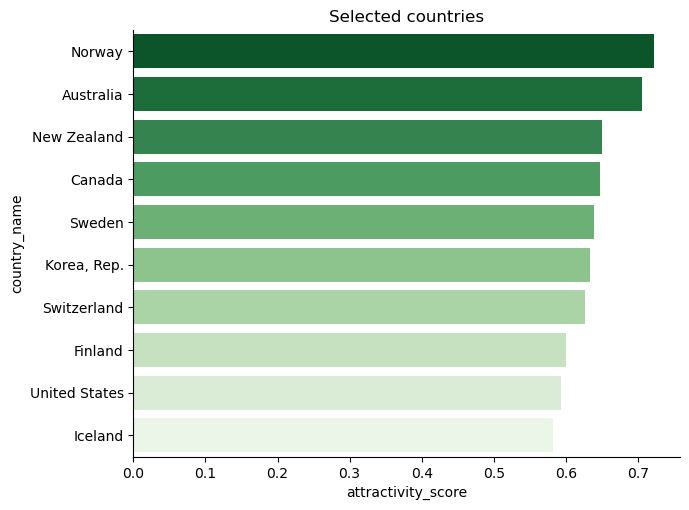

In [128]:
top_country = scaled_data.nlargest(TOPN, columns=["attractivity_score"], keep="all")
g = sns.catplot(data=top_country,
                kind="bar", orient="h", hue=None,
                y="country_name", x="attractivity_score", estimator=np.mean,
                height=5, aspect=1.4, palette="Greens_r",
               )
g.ax.set_title("Selected countries") ;

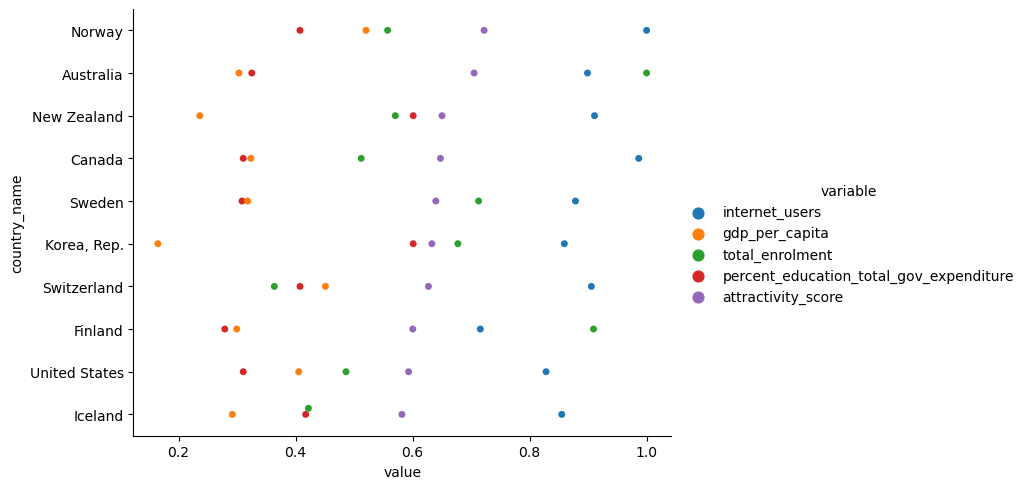

In [129]:
(pd.melt(top_country,
        id_vars=["country_name", "region"],
        value_vars=list_features + ["attractivity_score"],
        var_name=None,
        value_name='value',)
 .pipe((sns.catplot, "data"), kind="swarm",
       y="country_name", x="value", hue="variable", height=5, aspect=1.5
      )
);

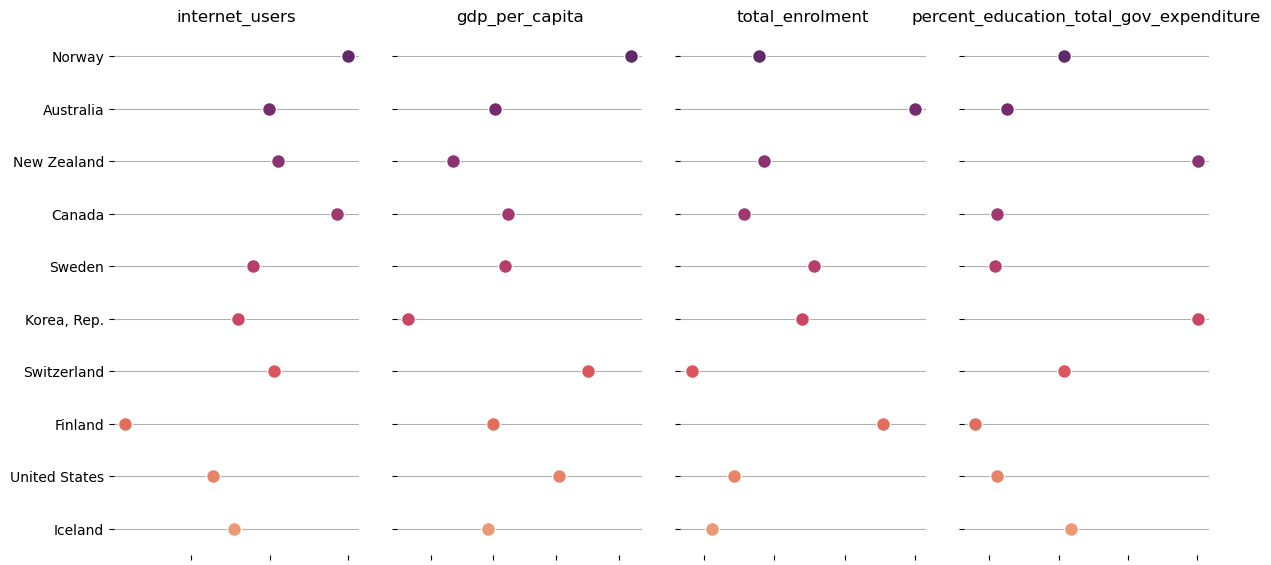

In [130]:
g = sns.PairGrid(top_country,
                 x_vars=list_features, y_vars=["country_name"],
                 height=6, aspect=.5,
                )

# Stripplot
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")


titles = list_features

# Labels
g.set(xlabel="", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xticklabels([])

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)

In [131]:
# top of region
scaled_data.groupby("region").attractivity_score.mean().nlargest(n=10)

region
North America                 0.620367
East Asia & Pacific           0.366177
Europe & Central Asia         0.332619
Middle East & North Africa    0.240436
Latin America & Caribbean     0.197159
Sub-Saharan Africa            0.130659
Name: attractivity_score, dtype: float64

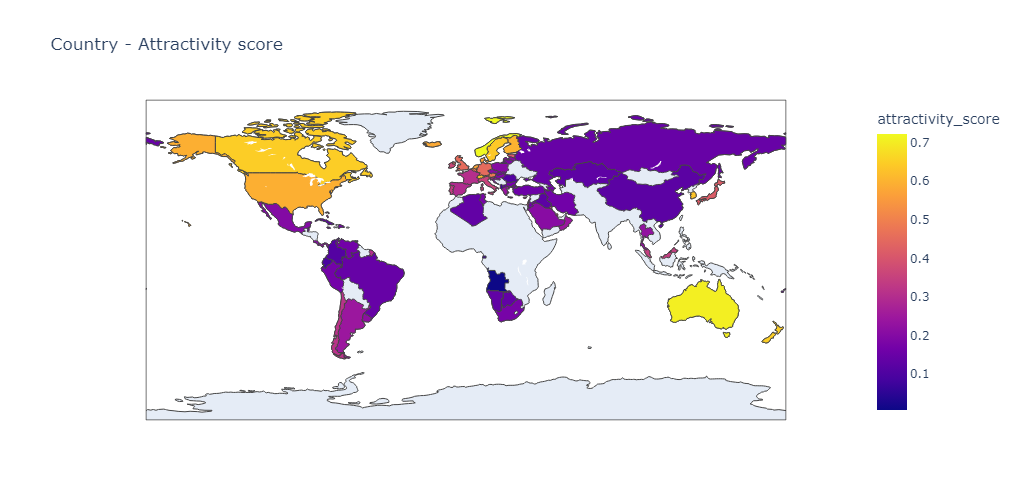

In [134]:
fig= px.choropleth(scaled_data.reset_index(),               
              locations="country_code",               
              color="attractivity_score",
              # hover_name="country_name",
              hover_data=["region", "country_name"],
              animation_frame=None,    
              color_continuous_scale='Plasma',  
              height=500,
              width=None,
              title="Country - Attractivity score",
              #range_color=(0, 12),
)
fig.show()
#fig.write_image("images/map_attractivity.png")

C:\Users\sareg\anaconda3\lib\site-packages\seaborn\categorical.py:3808: UserWarning:

Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.



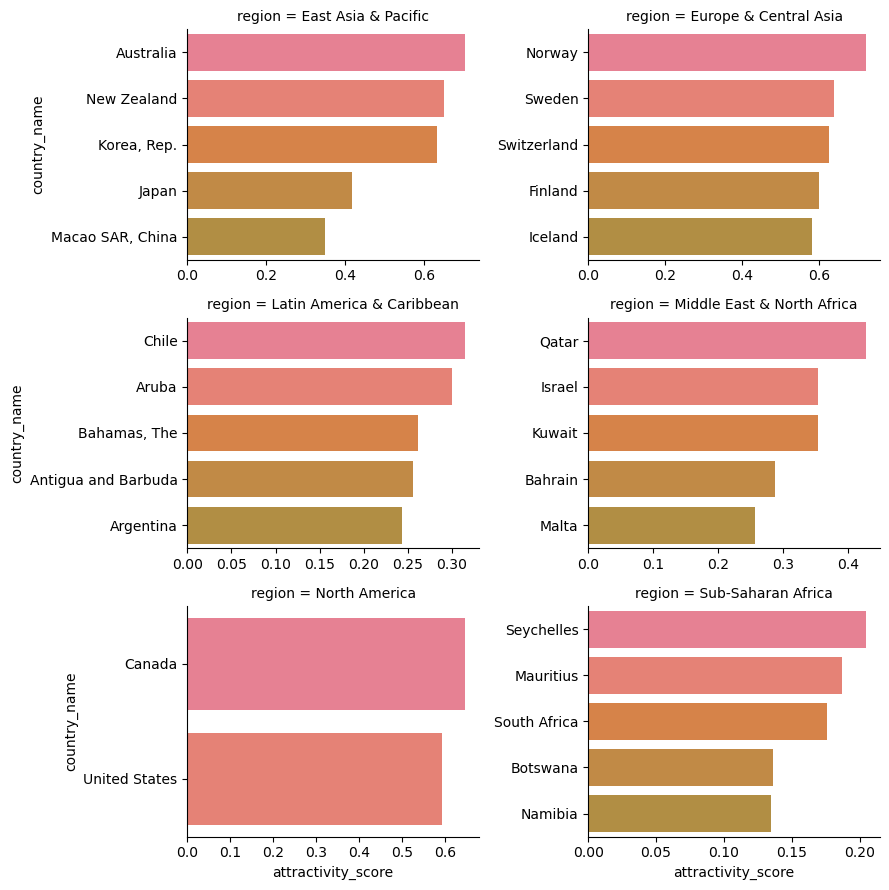

In [133]:
#!pip install -U kaleido
#top5 of country byy Region
g = (scaled_data.groupby("region", as_index=False)
     .apply(lambda g: g.nlargest(5, columns=["attractivity_score"], keep="all"))
     .pipe((sns.catplot, "data"), 
           kind="bar", orient="h", col="region", col_wrap=2,
           y="country_name", x="attractivity_score", estimator=np.mean,
           height=3, aspect=1.5, palette="husl", sharex=False, sharey=False
          )
    )
# save fig
#plt.savefig("images/top_country_per_region.png")